In [21]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc

BuRd = rcmap(cm.RdBu)

import hickle as hkl

#source_dirc=svintp.source
#exp_dirc=["aqua_2m/","aqua_20m/","land_rec20m/"]

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

# dirc=sys.argv

####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# #source='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/land_realtest/'
# source_dir='/project2/tas1/pragallva/Spring_quarter/post_process_data/'
# source = source_dir+'aqua_2m/'
            
# make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/")
# make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/")

# fig_dest="/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/"

a=6371.0e3
R=a

In [22]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

m5=(glob.glob('/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/aqua_isca5m/*.hkl'))
m10=(glob.glob('/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/aqua_isca10m/*.hkl'))
m50=(glob.glob('/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/aqua_isca50m/*.hkl'))
m100=(glob.glob('/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/aqua_isca100m/*.hkl'))

In [23]:
K='/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/aqua_isca5m0/zonal_decomposed_fluxes_dic.hkl'

In [24]:
ls /project2/tas1/pragallva/Summer_quarter_2018/post_process_data/aqua_isca5m0

all_MSE_flux.hkl  fluxes_dic.hkl  zonal_decomposed_fluxes_dic.hkl
coord_dic.hkl     time.npy        zonal_decomposed_fluxes_dic_vert.hkl
EKE.hkl           tsurf.hkl       zonal_radiation_dic.hkl
EKE.npy           T_uv_Z.hkl


In [25]:
S=hkl.load(K)

In [26]:
S.keys()

['SE_sensible',
 'TE_moist',
 'SE_flux',
 'SE_pot',
 'dhdt',
 'MM_flux',
 'KE_flux',
 'MM_pot',
 'TE_flux',
 'TE_sensible',
 'MM_sensible',
 'SE_moist',
 'MM_moist']

In [28]:
f=0; e=1;r=2; fv=3; c=4; d=5; dv=6; ts=7;

DEPTHS=[m5,m10,m50,m100]
flux=[]
flux_vert=[]
div=[]
div_vert=[]
eke=[]
raw=[]
tsurf=[]
coord=load(m5[c])
for depth in DEPTHS:
    flux.append(load(depth[f]))
    flux_vert.append(load(depth[fv]))
    div.append(load(depth[d])) 
    div_vert.append(load(depth[dv]))
    raw.append(load(depth[r]))
    eke.append(load(depth[e]))
    tsurf.append(load(depth[ts]))

In [30]:
print flux[0].keys()
# lat=div[0]['latn']

['dhdt', 'latnr', 'olr', 'SW_toa_d', 'MSE', 'shflx_u', 'MM_pot', 'TE_pot', 'lhflx_u', 'TE', 'SW_sfc_d', 'LW_sfc_d', 'SE_pot', 'MM_sens', 'TE_moist', 'SE_sens', 'SHF', 'SE_moist', 'SFC_u', 'latn', 'TOA_d', 'MM', 'TE_sens', 'MM_moist', 'SE', 'SWABS']


In [31]:
print flux_vert[0].keys()

['MM', 'TE', 'NE', 'SE']


In [32]:
# ind=np.squeeze(np.where((lat>60) & (lat<70)))
# py.figure(figsize=(10,5))
# for d in range(4):
#     py.subplot(2,2,d+1)
#     x=np.squeeze(raw[d]['U'][ind,...].mean(axis=0))
#     py.contourf(x-x.mean(axis=-1)[:,None])

In [33]:
raw[0].keys()

['Z', 'q', 'U', 'T', 'V', 'MSE', 'latn']

In [34]:
u=raw[0]['U']

In [35]:
v=raw[0]['V']

In [36]:
import scipy.io as sio

In [11]:
d5=0;d10=1;d50=2;d100=3

In [37]:
coord.keys()

['plev', 'lon', 'p_sfc', 'no_of_plevels', 'time', 'lat']

In [38]:
def save(X,name): 
    Y={'d5':X[d5], 'd10':X[d10],'d50':X[d50], 'd100':X[d100]}
    sio.savemat(name, Y)
dest= '/project2/tas1/pragallva/Summer_quarter_2018/MAT_files/'  
make_sure_path_exists(dest)
save(flux,dest+"Isca_depths_FLUX_in_PW.mat")
save(div, dest+"Isca_depths_DIV_in_W_m2.mat")
save(raw, dest+"Isca_depths_RAW_data_all_levels.mat")
sio.savemat(dest+"coordinates.mat", coord)

NameError: global name 'd5' is not defined

In [14]:
lat=div[0]['latn']
def M(X):
    #X=X-X.mean(axis=0)[None,:]
    return X
Iswabs=[]; Ishf=[]; Idhdt=[]; Iolr=[]; Ine=[];
ISW_sfc=[]; ISW_toa=[]; ILW_sfc=[]; Ishflx=[]; Ilhflx=[]; ISFC=[]; ITOA=[]; TS=[]
for depth in range(4):
    Iswabs.append(M(flux[depth]['SWABS']))
    Ishf.append(M(flux[depth]['SHF']))
    Idhdt.append(M(flux[depth]['dhdt']))
    Iolr.append(M(flux[depth]['olr']))
    ISW_sfc.append(-1*M(flux[depth]['SW_sfc_d'])) ## up
    ILW_sfc.append(M(-1*flux[depth]['LW_sfc_d'])) ## up
    ISW_toa.append(M(flux[depth]['SW_toa_d']))    ## dn
    Ishflx.append(M(flux[depth]['shflx_u']))      ## up
    Ilhflx.append(M(flux[depth]['lhflx_u']))      ## up
    
    ISFC.append(M(flux[depth]['SFC_u']))
    ITOA.append(M(flux[depth]['TOA_d']))
    
    TS.append(M(tsurf[depth]['tsurf']))
    
    Ine.append(Iswabs[depth]+Ishf[depth]-Iolr[depth]-Idhdt[depth])

In [15]:
flux[0].keys()
np.shape(TS)

(4, 1741, 12)

In [16]:
# range(40).shape

In [17]:
# py.contourf(u[:,:,:].mean(axis=-1).T)

In [18]:
# py.plot(Iswabs[0][:].mean(axis=1),'r-')
# py.plot(Ishf[0][:].mean(axis=1),'b-')
# py.plot(Iolr[0][:].mean(axis=1),'g-')
# py.plot(Idhdt[0][:].mean(axis=1),'k-')
# py.plot(Ine[0][:].mean(axis=1),'m-')

In [19]:
eke[0].keys()

['EMF', 'EKE_vert', 'EMF_vert', 'EKE', 'sigma_full', 'latn']

In [20]:
TE=[]; MM=[]; SE=[]; INE=[]; EKE_vert=[]; EMF_vert=[]
for depth in range(4):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM']))
    INE.append(TE[depth]+SE[depth]+MM[depth])
    EKE_vert.append(eke[depth]['EKE_vert'])
    EMF_vert.append(eke[depth]['EMF_vert'])

In [21]:
import scipy.integrate as integrate
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

In [22]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[];
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];
SW_sfc=[]; SW_toa=[]; LW_sfc=[]; shflx=[]; lhflx=[]; sfc=[]; toa=[]

for depth in range(4):
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
    SW_sfc.append(-1*div[depth]['SW_sfc_d'])
    LW_sfc.append(-1*div[depth]['LW_sfc_d'])
    SW_toa.append(div[depth]['SW_toa_d'])
    shflx.append(div[depth]['shflx_u'])
    lhflx.append(div[depth]['lhflx_u'])
    sfc.append(div[depth]['SFC_u'])
    toa.append(div[depth]['TOA_d'])
    

In [23]:
# d=3
# py.plot(swabs[d][:].mean(axis=1)-swabs[d].mean(),'r-')
# py.plot(shf[d][:].mean(axis=1)-shf[d].mean(),'b-')
# py.plot( -(olr[d][:].mean(axis=1)-olr[d].mean()),'g-')
# py.plot(dhdt[d][:].mean(axis=1)-dhdt[d].mean(),'k-')
# py.plot(ne[d][:].mean(axis=1)-ne[d].mean(),'m-')

# Average Northern and Southern Hemispheres

In [24]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE); EKE_vert=np.array(EKE_vert); EMF_vert=np.array(EMF_vert)
Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt);
ISW_sfc=np.array(ISW_sfc); ILW_sfc=np.array(ILW_sfc); ISW_toa=np.array(ISW_toa); Ishflx=np.array(Ishflx); Ilhflx=np.array(Ilhflx);
ISFC=np.array(ISFC); ITOA=np.array(ITOA); TS=np.array(TS)

In [25]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,:]+flux_flag*np.roll(x[:,l_S,:][:,::-1,:], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[:,:,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [26]:
print TE.shape
print EMF_vert.shape

(4, 1741, 12)
(4, 1741, 12)


In [27]:
TE_a   ,SE_a     , MM_a  , NE_a  , EMF_vert_a,   lat_a  = N_S_avg(TE, SE, MM, NE, EMF_vert, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]
EKE_vert_a, EKE_vert_a, TS_a, TS_a, TS_a, lat_a = N_S_avg( EKE_vert  ,EKE_vert,TS ,TS ,TS , lat, flux_flag=1 )

# TS_a = N_S_avg( TS  , TS , TS , TS , TS , lat, flux_flag=1 )[0]

In [28]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x,fac=1):
       N=100
#        fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(4):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a
div_EMF_vert_a=spher_div(EMF_vert_a*10**10, np.cos(np.radians(lat_a)) )

In [29]:
# div_EMF_vert_a

In [30]:
lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((4,13))
  for d in range(0,4):
      for m in range(0,13):
            l_range=((lat_a>=30) & (lat_a<=60))            
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

storm_pos=find_zero(div_TE_a)

In [31]:
div_TE_a.shape

(4, 871, 13)

In [32]:
# d=0
# py.figure(figsize=(12,12))
# for m in range(12):
#     py.subplot(4,3,m+1)
#     v=np.arange(-220,220,20)
#     py.plot(lat_a,div_TE_a[d,:,m],'r-',label='TE')
#     py.plot(lat_a,div_NE_a[d,:,m],'k-',label='INE')
#     py.title(str(m+1),fontsize=15)
#     py.axhline(0)
#     py.ylim(-200,200)
#     py.tight_layout()

In [33]:
# d=0
# py.figure(figsize=(12,12))
# for m in range(12):
#     py.subplot(4,3,m+1)
#     v=np.arange(-220,220,20)
#     py.plot(lat_a,TE_a[d,:,m],'r-',label='TE')
#     py.plot(lat_a[:-1],Ine_a[d,:,m],'k-',label='INE')
#     py.title(str(m+1),fontsize=15)
#     py.axhline(0)
#     py.ylim(-15,15)
#     py.legend(loc='best')
#     py.tight_layout()

In [34]:
# py.figure(figsize=(15,7))
# depths=np.array([5,10,50,100])
# for d in range(4):
#     py.subplot(2,2,d+1)
#     v=np.linspace(-3,3,20)
#     py.contourf(range(13),lat_a,EKE_a[d,...]/10**6,v,cmap=BuRd);py.colorbar()
#     py.contour(range(13),lat_a,div_TE_a[d,...],levels=[0.00],colors='k')
#     py.title(str(depths[d])+'m',fontsize=15)
#     py.tight_layout()

In [35]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     py.subplot(2,2,d+1)
#     v=np.arange(-20,20,2)
#     py.contourf(range(13),lat_a,TE_a[d,...],v,cmap=BuRd)
#     py.colorbar()
#     c=py.contour(range(13),lat_a[0:-1],Ine_a[d,...],10,colors='k')
#     py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
#     py.title(str(d),fontsize=15)
#     py.tight_layout()

In [36]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=storm_pos
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

Intensity_te=inerp_at_max(TE_a,lat_a)
Intensity_se=inerp_at_max(SE_a,lat_a)
Intensity_mm=inerp_at_max(MM_a,lat_a)
Intensity_ne=inerp_at_max(NE_a,lat_a)


I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)




# Shift decompose

In [37]:
import numpy as np
def calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1):
    
    div_TE_a=spher_div(TE_a*10**15)
    div_SE_a=spher_div(SE_a*10**15)
    div_MM_a=spher_div(MM_a*10**15)
    div_NE_a=div_TE_a+div_SE_a+div_MM_a
    
    se=np.array(div_SE_a); te=np.array(div_TE_a); mm=np.array(div_MM_a); ne=np.array(div_NE_a)
    
    def diff(x):
        return x[:,:,1:]-x[:,:,:-1] 
    base_pos=te[...,:-1]
    
    if month_to_month==0 :
      def diff(x):
         return x[:,:,1:]-x[...,1:,None].mean(axis=2)    
      base_pos=te[...,1:,None].mean(axis=2)
        
    TE_change=base_pos+diff(te)
    NE_change=base_pos+diff(ne)
    SE_change=base_pos-diff(se)
    MM_change=base_pos-diff(mm)
    
    a = lambda x: np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(SE_change), a(MM_change), a(TE_change), a(NE_change)

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=0)

In [38]:
def find_zero(div,lower_limit=30,specific_month=-1):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((depths,months))
  for d in range(0,depths):
      for m in range(0,months):
            l_range=((lat_a>=30) & (lat_a<=60))   
            if m==specific_month:
                l_range=((lat_a>=lower_limit) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

In [39]:
def threshold(I,value, pos1, pos2, pos3, pos4):
      for d in range(4):  
        for m in range(13):
            if (np.abs(I[d,m])<value) :
                #N[d,m]=np.nan
                pos1[d,m]=np.nan
                pos2[d,m]=np.nan
                pos3[d,m]=np.nan
                pos4[d,m]=np.nan                
      return pos1, pos2, pos3, pos4
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, 1.0, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))

In [40]:
def contf(l,y, cMAP,d,limit=300):
#     py.subplot(220+d+1)
    toh = rcmap(cm.hot)
    roll=0; min=20; max=60;
#     y=y[:,1:]-y[:,:-1]
#     y=np.append(y[:,-1,None],y,axis=-1)
    #limit=np.max([np.abs(np.max(y)),np.abs(np.min(y))])
    #y=y-np.mean(y,axis=-1)[...,None]
    v=np.linspace(-1*limit,limit,25)
#     py.clf()
    py.contourf(range(13),l,y,v,cmap=cMAP); #py.colorbar()
    c=py.contour(range(13),l,y,v,colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)
    pos=div_TE_a[d,...]
    #py.contour(range(13),lat_a,pos,levels=[0.000],colors='k',linewidth=3.5)
    py.plot(range(13),zero_div_TE[d,:],'k-')
    py.ylim(0,80)
    py.tick_params(labelsize=18,size=4,width=2)


In [41]:
zero_div_TE.shape

(4, 13)

In [42]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a,TE_a[d,...], cm.seismic,d,20)

In [43]:
# py.figure(figsize=(30,15))
# for d in range(4):
#     py.subplot(4,4,4*d+1)
# #     if d==0:
# #         py.title("NE",fontsize=20)
#     contf(lat_a,NE_a[d,...], cm.seismic,d,15)
#     py.subplot(4,4,4*d+2)
# #     if d==1:
# #         py.title("TE",fontsize=20)
#     contf(lat_a,TE_a[d,...], cm.seismic,d,15)
#     py.subplot(4,4,4*d+3)
# #     if d==2:
# #         py.title("SE",fontsize=20)
#     contf(lat_a,SE_a[d,...], cm.seismic,d,15)
#     py.subplot(4,4,4*d+4)
# #     if d==3:
# #         py.title("MM",fontsize=20)
#     contf(lat_a,MM_a[d,...], cm.seismic,d,15)

In [44]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a,SE_a[d,...], cm.seismic,d)

In [45]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a[0:-1],Ine_a[d,...], cm.seismic,d,20)

In [46]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a,MM_a[d,...], cm.seismic,d,20)

In [47]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a,div_TE_a[d,...], cm.seismic,d,300)

In [48]:
# py.figure(figsize=(20,10))
# for m in range(12):
#     d=1; 
#     py.subplot(3,4,m+1)
#     py.plot(lat_a, -sfc_a[d,:,m]+dhdt_a[d,:,m],'b-')
#     py.plot(lat_a, toa_a[d,:,m],'r-')
# #     py.plot(lat_a, -dhdt_a[d,:,m],'k-')
#     py.plot(lat_a, div_NE_a[d,:,m],'m-')
#     py.axhline(0,color='k')
#     py.axvline(20,color='k')
# #     py.ylim(-200,200)
# #     py.xlim(00,80)
    
#     d=0
# #     print d
#     py.plot(lat_a, -sfc_a[d,:,m]+dhdt_a[d,:,m],'b--')
#     py.plot(lat_a, toa_a[d,:,m],'r--')
# #     py.plot(lat_a, -dhdt_a[d,:,m],'k-')
#     py.plot(lat_a, div_NE_a[d,:,m],'m--')
#     py.axhline(0,color='k')
#     py.axvline(20,color='k')
#     py.ylim(-200,200)
#     py.xlim(00,80)

In [49]:
# rec = (cm.Reds(np.linspace(0.2, 1.0, 4)))
# bec = (cm.Blues(np.linspace(0.2, 1.0, 4)))
# kec = (cm.Greens(np.linspace(0.2, 1.0, 4)))
# months=np.array(['J','F','M','A','M','J','J','A','S','O','N','D'])
# d=0
# py.figure(figsize=(20,10))
# for m in range(12):
#     py.subplot(3,4,m+1)
#     py.plot(lat_a, toa_a[d,:,m],color=rec[d],ls='-',lw=3.5)
#     py.plot(lat_a, toa_a[d+1,:,m],color=rec[d+1],ls='-',lw=3.5)
#     py.plot(lat_a, toa_a[d+2,:,m],color=rec[d+2],ls='-',lw=3.5)
#     py.plot(lat_a, toa_a[d+3,:,m],color=rec[d+3],ls='-',lw=3.5)
    
#     py.plot(lat_a, sfc_a[d,:,m]-dhdt_a[d,:,m],color=bec[d],ls='-',lw=3.5)
#     py.plot(lat_a, sfc_a[d+1,:,m]-dhdt_a[d+1,:,m],color=bec[d+1],ls='-',lw=3.5)
#     py.plot(lat_a, sfc_a[d+2,:,m]-dhdt_a[d+2,:,m],color=bec[d+2],ls='-',lw=3.5)
#     py.plot(lat_a, sfc_a[d+3,:,m]-dhdt_a[d+3,:,m],color=bec[d+3],ls='-',lw=3.5)
    
# #     py.plot(lat_a, -dhdt_a[d,:,m],color=kec[d],ls='-',lw=3.5)
# #     py.plot(lat_a, -dhdt_a[d+1,:,m],color=kec[d+1],ls='-',lw=3.5)
# #     py.plot(lat_a, -dhdt_a[d+2,:,m],color=kec[d+2],ls='-',lw=3.5)
# #     py.plot(lat_a, -dhdt_a[d+3,:,m],color=kec[d+3],ls='-',lw=3.5)
    
#     py.title(months[m])
#     py.axhline(0,color='k')
# #     py.ylim(-250,250)
#     py.xlim(0,80)


In [50]:
# mec = (cm.Purples(np.linspace(0.3, 0.8, 4)))
# months=np.array(['J','F','M','A','M','J','J','A','S','O','N','D'])
# d=0
# py.figure(figsize=(20,10))
# for m in range(12):
#     py.subplot(3,4,m+1)
#     py.plot(lat_a, div_NE_a[d,:,m],color=mec[d],ls='-',lw=3.5)
#     py.plot(lat_a, div_NE_a[d+1,:,m],color=mec[d+1],ls='-',lw=3.5)
#     py.plot(lat_a, div_NE_a[d+2,:,m],color=mec[d+2],ls='-',lw=3.5)
#     py.plot(lat_a, div_NE_a[d+3,:,m],color=mec[d+3],ls='-',lw=3.5)
#     py.axhline(0)
#     py.xlim(30,60)
#     py.ylim(-100,50)

In [51]:
def ann_mean(y):
    return np.dstack([y.mean(axis=-1)]*13)

In [52]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a,sfc_a[d,...], cm.seismic,d,400)
#     py.ylim(0,80)

In [53]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a,toa_a[d,...], cm.seismic,d,400)
#     py.grid('on')
#     py.ylim(0,80)

In [54]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a,sfc_a[d,...]+toa_a[d,...]-dhdt_a[d,...], cm.seismic,d,400)
#     py.grid('on')
#     py.ylim(0,80)

In [55]:
# py.figure(figsize=(15,7))
# l=300;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$TOA\:\: (Wm^{-2})$",fontsize=20)
#     contf(lat_a,ann_mean(toa_a)[d,...], cm.seismic,d,l)
#     py.contour(range(13),lat_a,toa_a[d,...]-ann_mean(toa_a)[d,...],v,cmap=cm.seismic)    
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)
# #     py.xlim(0,6)

In [56]:
# py.figure(figsize=(15,7))
# l=300;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SFC\:\: (Wm^{-2})$",fontsize=20)
#     contf(lat_a,ann_mean(sfc_a)[d,...], cm.seismic,d,l)
#     py.contour(range(13),lat_a,sfc_a[d,...]-ann_mean(sfc_a)[d,...], v,cmap=cm.seismic)
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)
# #     py.xlim(0,6)

In [57]:
# py.figure(figsize=(15,7))
# l=300;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$-\frac{dh}{dt}\:\: (Wm^{-2})$",fontsize=20)
#     contf(lat_a,ann_mean(-dhdt_a)[d,...], cm.seismic,d,l)
#     py.contour(range(13),lat_a,-dhdt_a[d,...]-ann_mean(-dhdt_a)[d,...], v,cmap=cm.seismic)
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)
# #     py.xlim(0,6)

In [58]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SFC+TOA-\frac{dh}{dt}=\:\:F_{NE}\:\: (Wm^{-2})$",fontsize=20)
#     contf(lat_a,ann_mean(toa_a+sfc_a-dhdt_a)[d,...], cm.seismic,d,l)
#     c=py.contour(range(13),lat_a,(toa_a+sfc_a-dhdt_a)[d,...]-ann_mean(toa_a+sfc_a-dhdt_a)[d,...], v,cmap=cm.seismic)
#     py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)  
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)
# #     py.tight_layout()
# #     py.xlim(0,6)

In [59]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SFC+TOA-\frac{dh}{dt}=\:\:F_{NE}\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(toa_a+sfc_a-dhdt_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(toa_a+sfc_a-dhdt_a)[d,...]-ann_mean(toa_a+sfc_a-dhdt_a)[d,...], v,cmap=cm.seismic); py.colorbar()
#     #py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)  
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)
#     py.plot(range(13),zero_div_TE[d,:],'k-')
# #     py.tight_layout()
# #     py.xlim(0,6)

In [60]:
# TE_a   ,SE_a     , MM_a   , NE_a     ,ignore,  lat_a = N_S_avg(TE, SE, MM, NE,NE, lat)
# Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
# ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
# ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
# ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]

In [61]:
# py.figure(figsize=(15,7))
# l=5;
# title="I_{NE}"
# y=Ine_a
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$"+title+"\:\: (PW)$",fontsize=20)
#     #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a[:-1],(y)[d,...]-ann_mean(y)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d]),fontsize=20)

In [62]:
# SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
# SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

# SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
# sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]


In [63]:
# py.figure(figsize=(15,7))
# l=800;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SW_{TOA}\:\: (Wm^{-2})$",fontsize=20)
#     contf(lat_a,ann_mean(SW_toa_a)[d,...], cm.seismic,d,l)
#     py.contour(range(13),lat_a,(SW_toa_a)[d,...]-ann_mean(SW_toa_a)[d,...], v,cmap=cm.seismic)
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)
# #     py.tight_layout()
# #     py.xlim(0,6)

In [64]:
# py.figure(figsize=(15,7))
# l=800;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$-OLR\:\: (Wm^{-2})$",fontsize=20)
#     contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
#     py.contour(range(13),lat_a,(-OLR_a)[d,...]-ann_mean(-OLR_a)[d,...], v,cmap=cm.seismic)
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [65]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SWABS\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(SWABS_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(SWABS_a)[d,...]-ann_mean(SWABS_a)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [66]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SHF\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(SWABS_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(SHF_a)[d,...]-ann_mean(SHF_a)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [67]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$-OLR\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(-OLR_a)[d,...]-ann_mean(-OLR_a)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [68]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$LW_{SFC}\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(LW_sfc_a)[d,...]-ann_mean(LW_sfc_a)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [69]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$LHFLX\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(lhflx_a)[d,...]-ann_mean(lhflx_a)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [70]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SHFLX\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(shflx_a)[d,...]-ann_mean(shflx_a)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [71]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SW_{SFC}\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(SW_sfc_a)[d,...]-ann_mean(SW_sfc_a)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [72]:
# py.figure(figsize=(15,7))
# l=150;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     py.suptitle(r"$SHF-OLR\:\: (Wm^{-2})$",fontsize=20)
#     #contf(lat_a,ann_mean(-OLR_a)[d,...], cm.seismic,d,l)
#     py.subplot(2,2,d+1)
#     py.contour(range(13),lat_a,(SHF_a-OLR_a)[d,...]-ann_mean(SHF_a-OLR_a)[d,...], v,cmap=cm.seismic);
#     py.colorbar()
#     py.plot(range(13),zero_div_TE[d,:],'k-')
#     py.ylim(0,80)
#     py.title(str(depths[d])+'m',fontsize=20)

In [73]:
# py.figure(figsize=(15,7))
# l=8;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     #py.subplot(2,2,d+1)
#     py.suptitle(r"${TE}\:\: (PW)$",fontsize=20)
#     contf(lat_a,ann_mean(TE_a)[d,...], cm.seismic,d,l)
#     c=py.contour(range(13),lat_a,(TE_a)[d,...]-ann_mean(TE_a)[d,...], v,cmap=cm.seismic)
#     py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)  
#     #py.contourf(range(13),lat_a,(TE_a)[d,...]-ann_mean(TE_a)[d,...], v,cmap=cm.seismic)
#     py.ylim(0,88)
#     py.title(str(depths[d])+'m',fontsize=20)
#     py.plot(range(13),zero_div_TE[d,:],'k-')
# #     py.tight_layout()
# #     py.xlim(0,6)

In [74]:
# py.figure(figsize=(15,7))
# l=8;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     #py.subplot(2,2,d+1)
#     py.suptitle(r"${MM}\:\: (PW)$",fontsize=20)
#     contf(lat_a,ann_mean(MM_a)[d,...], cm.seismic,d,l)
#     c=py.contour(range(13),lat_a,(MM_a)[d,...]-ann_mean(MM_a)[d,...], v,cmap=cm.seismic)
#     py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)  
#     #py.contourf(range(13),lat_a,(TE_a)[d,...]-ann_mean(TE_a)[d,...], v,cmap=cm.seismic)
#     py.ylim(0,88)
#     py.title(str(depths[d])+'m',fontsize=20)
#     py.plot(range(13),zero_div_TE[d,:],'k-')
# #     py.tight_layout()
# #     py.xlim(0,6)

In [75]:
# py.figure(figsize=(15,7))
# l=8;
# v=np.linspace(-1*l,l,30)
# for d in range(4):
#     #py.subplot(2,2,d+1)
#     py.suptitle(r"${NE}\:\: (PW)$",fontsize=20)
#     contf(lat_a[0:-1],ann_mean(Ine_a)[d,...], cm.seismic,d,l*3)
#     c=py.contour(range(13),lat_a[0:-1],(Ine_a)[d,...]-ann_mean(Ine_a)[d,...], v,cmap=cm.seismic)
#     py.clabel(c,  inline=1,fmt = '%1.1f',colors='k',inline_spacing=5, fontsize=12)  
#     #py.contourf(range(13),lat_a,(TE_a)[d,...]-ann_mean(TE_a)[d,...], v,cmap=cm.seismic)
#     py.ylim(0,88)
#     py.title(str(depths[d])+'m',fontsize=20)
#     py.plot(range(13),zero_div_TE[d,:],'k-')
# #     py.tight_layout()
# #     py.xlim(0,6)

In [76]:
Ine_a.shape

(4, 870, 13)

In [77]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a[0:-1],ISFC_a[d,...], cm.seismic,d,50)
#     py.ylim(0,80)

In [78]:
# py.figure(figsize=(15,7))
# for d in range(4):
#     contf(lat_a[0:-1],ITOA_a[d,...], cm.seismic,d,50)
#     py.ylim(0,80)

In [79]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=storm_pos
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

Intensity_te=inerp_at_max(TE_a,lat_a)
Intensity_se=inerp_at_max(SE_a,lat_a)
Intensity_mm=inerp_at_max(MM_a,lat_a)
Intensity_ne=inerp_at_max(NE_a,lat_a)

I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)




## Shift decompose

In [80]:
import numpy as np
def calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1):
    
    div_TE_a=spher_div(TE_a*10**15)
    div_SE_a=spher_div(SE_a*10**15)
    div_MM_a=spher_div(MM_a*10**15)
    div_NE_a=div_TE_a+div_SE_a+div_MM_a
    
    se=np.array(div_SE_a); te=np.array(div_TE_a); mm=np.array(div_MM_a); ne=np.array(div_NE_a)
    
    def diff(x):
        return x[:,:,1:]-x[:,:,:-1] 
    base_pos=te[...,:-1]
    
    if month_to_month==0 :
      def diff(x):
         return x[:,:,1:]-x[...,1:,None].mean(axis=2)    
      base_pos=te[...,1:,None].mean(axis=2)
        
    TE_change=base_pos+diff(te)
    NE_change=base_pos+diff(ne)
    SE_change=base_pos-diff(se)
    MM_change=base_pos-diff(mm)
    
    a = lambda x: np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(SE_change), a(MM_change), a(TE_change), a(NE_change)

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=0)

In [81]:
div_NE_a.shape

(4, 871, 13)

In [82]:
def find_zero(div,lower_limit=30,specific_month=-1):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((depths,months))
  for d in range(0,depths):
      for m in range(0,months):
            l_range=((lat_a>=30) & (lat_a<=60))   
            if m==specific_month:
                l_range=((lat_a>=lower_limit) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

In [83]:
def plot_flux(d,threshold_value) :
    
    n=d+1
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    pos=zero_div_TE
    
    if d==0:depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100

    mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),6)
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       y= np.roll(y,6,axis=-1)  
       return y

    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-12.0, 13.0, threshold_value)
    latns=lat

    py.subplot(2,2,n)
    b = py.contourf(range(13),lat_a,add(TE_a[d,...]), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(range(13),lat_a, add(TE_a[d,...]), v, colors='k',linewidths=1.0);
    
    py.plot(range(13), np.roll((pos[d,:]),6), 'ro-')
    #py.plot(range(13), (Intensity_te[d,:]*5), 'bo-')
    
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(-0,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depth)+' m',fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
    py.ylim(0,80)
#     py.savefig(fig_dest+title+'_flux.pdf')
    #print fig_dest+title+'_flux.pdf'
    #py.show()

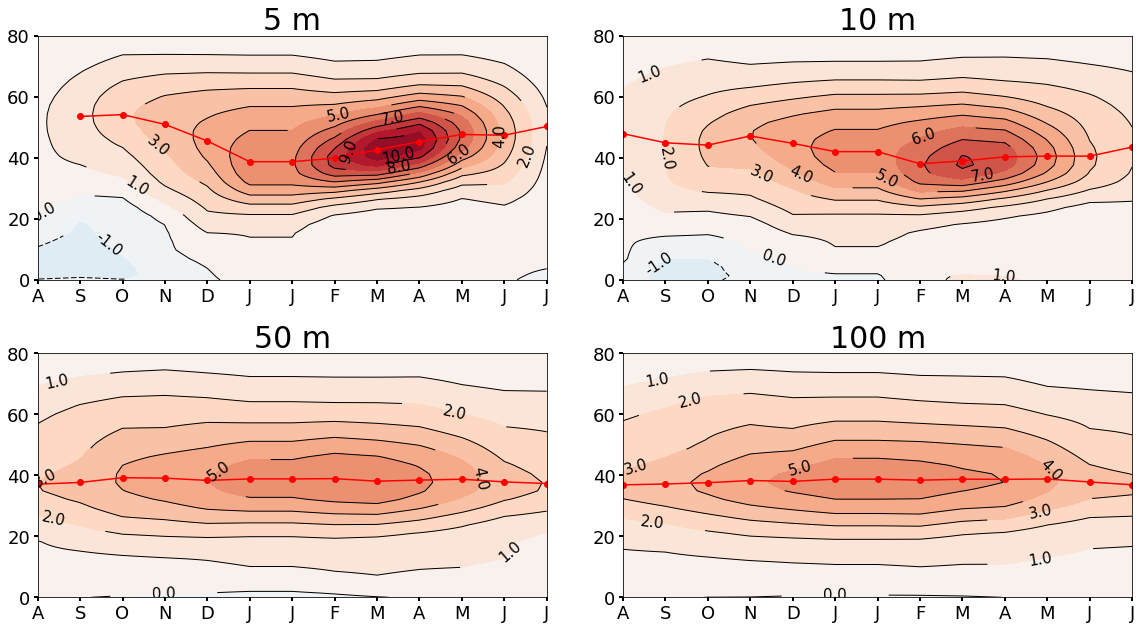

In [84]:
fig=py.figure(figsize=(20, 10))
for d in range(4):
    plot_flux(d,1.0)

In [85]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(d,l,month_to_month=1,threshold_value=+1) :
        
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
            
    I=Intensity_te
    
    n=d+1    
#     month_to_month=1
#     threshold_value=0
    SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
    if d==0:
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
    else :
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
    if ((d==0) & (month_to_month==0)):
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))
    
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))
    
    
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    base_pos=zero_div_TE[d,:-1]
    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y
        
    if month_to_month==0:
        s=TE_change[d,:,1:].mean(axis=-1)[None,:,None]
        base_pos=find_zero(s)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        #base_pos=44 #np.nanmean(zero_div_TE[d,:-1])
        print base_pos
        
    TE_obs_pos         = add_month_to_end(zero_div_TE[d,1:]-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE[d,1:]-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM[d,1:]-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE[d,1:]-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
        
#     py.subplot(220+n)
    
    fig=py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi$',linewidth=3.5,markersize=20)
    fig=py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)

    title="shift decomposition"+" "+" ("+str(depth)+"m)"
    title1="shift_decomp"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()

[[44.67389893]]


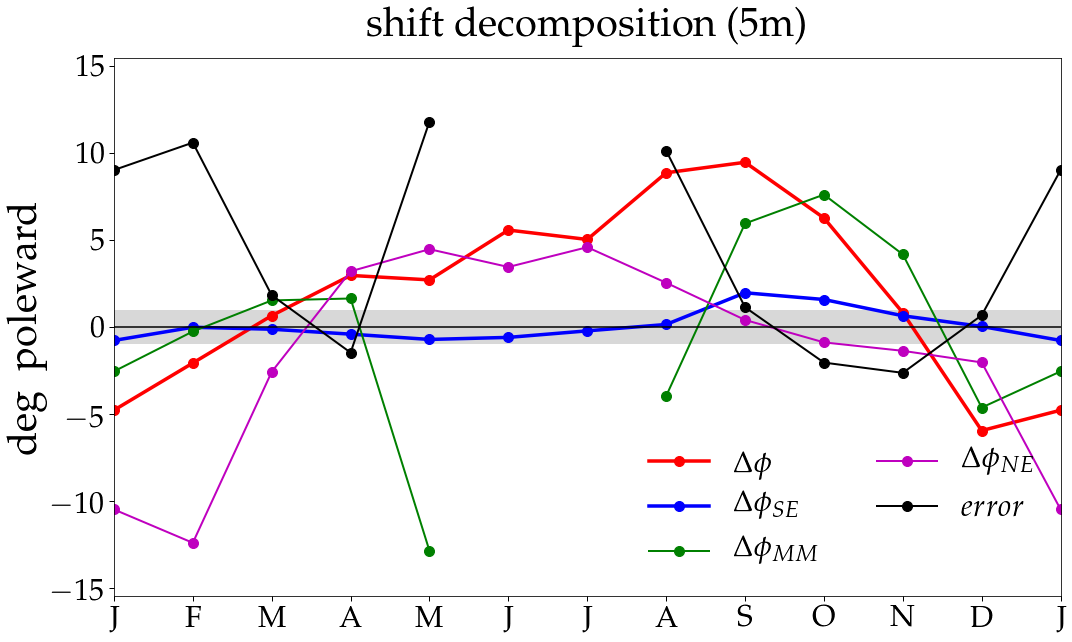

In [86]:
l=15.5
month_to_month=0; threshold_value=+0.0
plot_monthly_shift(0,l,month_to_month,threshold_value)

In [87]:
# plot_monthly_shift(0,10.5,month_to_month=0,threshold_value=1)

In [88]:
# plot_monthly_shift(2,16.5,month_to_month=1,threshold_value=+1)

In [89]:
# plot_monthly_shift(3,16.5,month_to_month=1,threshold_value=+1)

In [90]:
# plot_monthly_shift(3,16.5,month_to_month=0,threshold_value=1)

In [91]:
# plot_monthly_shift(0,16.5,month_to_month=0,threshold_value=1)

# Intensity decomposition

In [92]:
### radiation

def plot_intensity(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
           
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=3.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=3.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=3.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=3.5)
                                              
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title=""+" "+" "+str(depth)+"m"
    title1="Intensity_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=44,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
#     py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=32,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
    #print fig_dest+title1+'.pdf'

    
    py.tight_layout()

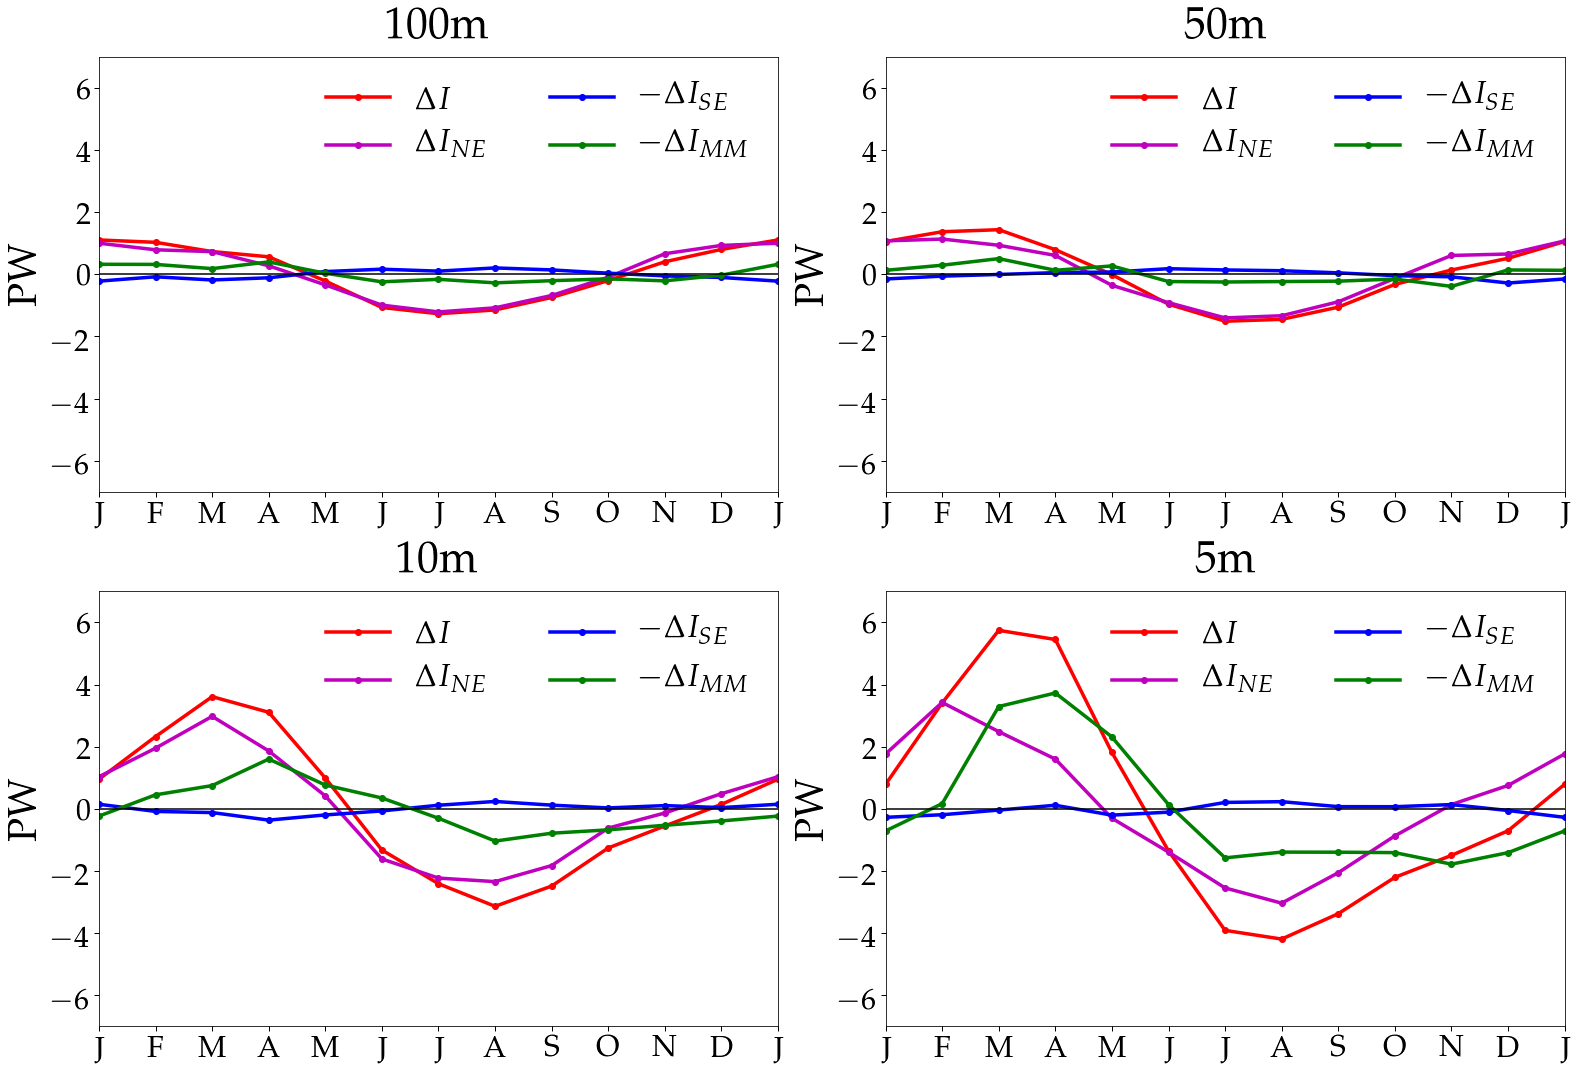

In [93]:
l=7; i=0;
fig=py.figure(figsize=(22, 15))
for d in range(3,-1,-1):
    py.subplot(2,2,i+1)
    plot_intensity(d,l,0)
    i=i+1

In [94]:
### radiation

def D(y,d):
    y1=np.append(y,y[:,0,np.newaxis],axis=1)
    x1=y1[d,1:]-y1[d,:-1]
    x2=np.append(x1[-1],x1)
    return x2

def plot_delta_NE(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    

    def D(y,d):
        if month_to_month==1 :
            y1=y
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            #mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            #mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
            
#     fig=py.figure(figsize=(10, 6))           
    #py.plot(D(I_NE,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)
    #py.plot(D(I_SWAB,d),'co-',label=r'$\Delta I_{SWABS}$',lw=2.5)
    py.plot(D(I_SHF,d),'bo-',label=r'$\Delta I_{SHF}$',lw=3.5)
    py.plot(D(-I_OLR,d),'go-',label=r'$ - \Delta I_{OLR}$',lw=3.5) 
        #py.plot(D(-I_dhdt_N,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
        #py.plot(D(-I_dhdt_S,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title=""+" "+""+str(depth)+"m"
    title1="NE_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.3, 0.3, facecolor='0.5', alpha=0.3)
    py.legend(fontsize=32,ncol=2,frameon=False, loc='best')

    
    #py.savefig(fig_dest+title1+'.pdf')
    #print fig_dest+title1+'.pdf'    
    py.tight_layout()

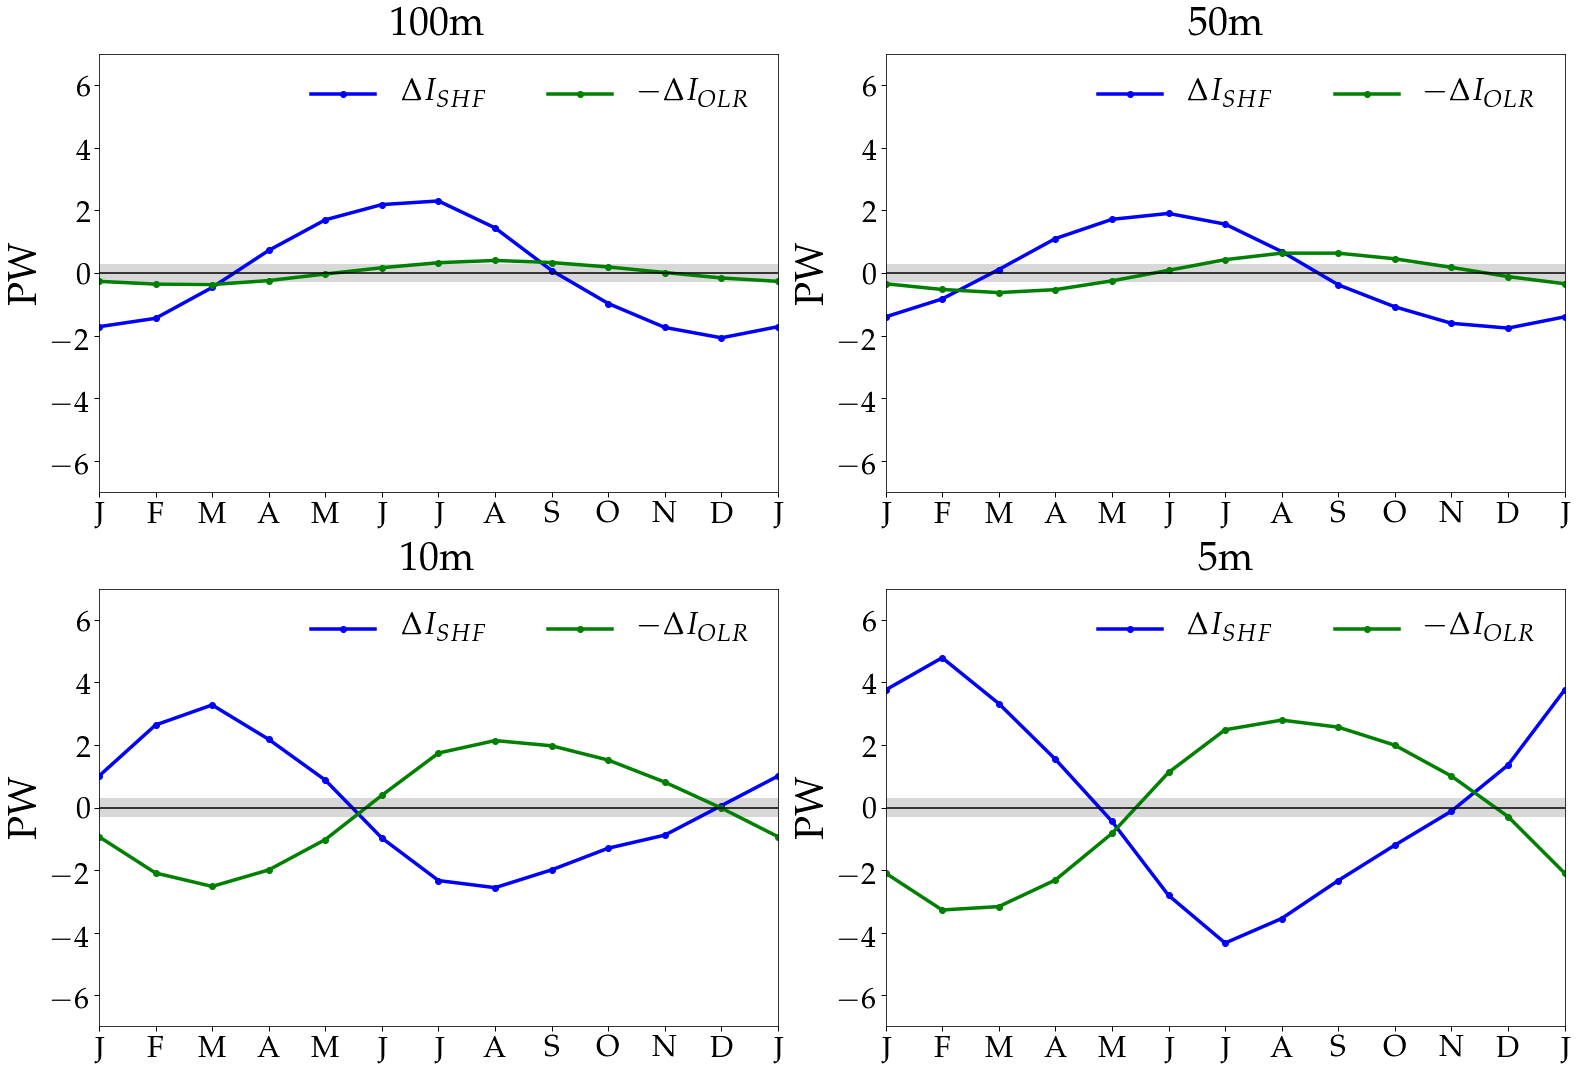

In [95]:
l=7; i=0;
fig=py.figure(figsize=(22, 15))
for d in range(3,-1,-1):
    py.subplot(2,2,i+1)
    plot_delta_NE(d,l,0)
    i=i+1

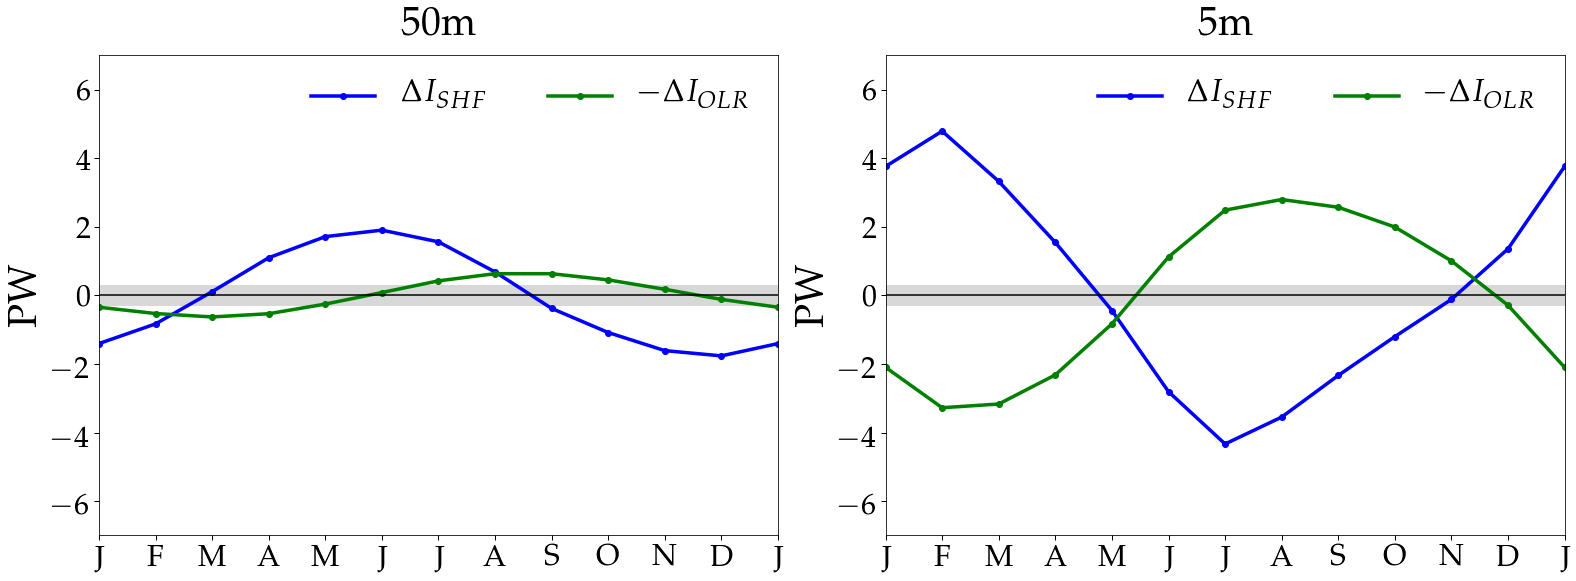

In [96]:
l=7; i=0;
fig=py.figure(figsize=(22, 15))
for d in range(2,-1,-2):
    py.subplot(2,2,i+1)
    plot_delta_NE(d,l,0)
    i=i+1

In [97]:
def compare_plot(n,X,c,T,month_to_month=1,l=3):
    #py.subplot(1,2,n)
#     py.subplot(220+n)

#     py.subplot(3,1,n)
    py.subplot(4,1,n)
    d=0
    
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    def D(y):
        if month_to_month==1 :
            x1=y[1:]-y[:-1]
            x2=np.append(x1[-1],x1)
        else :
            y1=y[:]-y[:-1,None].mean(axis=0)
            x2=y1
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
#     py.plot(range(13),D(X[d,:]),c+'o-',label='5m',lw=2.0)
#     py.plot(range(13),D(X[d+1,:]),c+'o--',label='10m',lw=2.0)
#     py.plot(range(13),D(X[d+2,:]),c+'o-.',label='50m',lw=2.0)
#     py.plot(range(13),D(X[d+3,:]),c+'o:',label='100m',lw=2.0)
     
    py.plot(range(13),D(X[d+3,:]),c+'o-',label='100m',lw=2.5)
    py.plot(range(13),D(X[d+2,:]),c+'o--',label='50m',lw=2.5)
    py.plot(range(13),D(X[d+1,:]),c+'o-.',label='10m',lw=2.5)
    py.plot(range(13),D(X[d,:]),c+'o:',label='5m',lw=2.5)
       
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel('PW',fontsize=30)
    if n==1:
        py.legend(loc='best',fontsize=29,ncol=2,frameon=False)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title(T,fontsize=35)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=25,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$')
# compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$')
# compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$')
# compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$')


In [98]:
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,Intensity_te,'r',r'$\Delta I_{TE}$',l=4)
# compare_plot(2,-Intensity_se,'b',r'$ - \Delta I_{SE}$',l=4)
# compare_plot(3,-Intensity_mm,'g',r'$ - \Delta I_{MM}$',l=4)
# compare_plot(4,Intensity_ne,'m',r'$\Delta I_{NE}$',l=4)

In [99]:
# m_to_m=0; l=8
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
# compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$',m_to_m,l)
# compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$',m_to_m,l)
# compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$',m_to_m,l)

In [100]:
# m_to_m=0; l=7
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,Intensity_te,'r',r'$\Delta I_{TE}$',m_to_m,l)
# compare_plot(2,-Intensity_se,'b',r'$ - \Delta I_{SE}$',m_to_m,l)
# compare_plot(3,-Intensity_mm,'g',r'$ - \Delta I_{MM}$',m_to_m,l)
# compare_plot(4,Intensity_ne,'m',r'$\Delta I_{NE}$',m_to_m,l)

In [101]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=40
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D


I_SWAB_at40 =inerp_at_max(Iswabs_a,latr_a)
I_SHF_at40  =inerp_at_max(Ishf_a,latr_a)
I_NE_at40   =inerp_at_max(Ine_a,latr_a)
I_OLR_at40  =inerp_at_max(Iolr_a,latr_a)
I_dhdt_at40 =inerp_at_max(Idhdt_a,latr_a)

In [102]:
print 1

1


In [103]:
# m_to_m=0; l=8
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_SWAB_at40,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
# compare_plot(2,I_SHF_at40,'b',r'$\Delta I_{SHF}$',m_to_m,l)
# compare_plot(3,-I_OLR_at40,'g',r'$ - \Delta I_{OLR}$',m_to_m,l)
# compare_plot(4,I_NE_at40,'m',r'$\Delta I_{NE}$',m_to_m,l)

# Decompose Net energy in Watts/m^2

In [104]:
swabs=np.array(swabs); shf=np.array(shf); ne=np.array(ne); olr=np.array(olr); dhdt=np.array(dhdt);
SW_sfc=np.array(SW_sfc); LW_sfc=np.array(LW_sfc); SW_toa=np.array(SW_toa); shflx=np.array(shflx); lhflx=np.array(lhflx);
sfc=np.array(sfc); toa=np.array(toa); 

In [105]:
#     swabs.append(div[depth]['SWABS'])
#     shf.append(div[depth]['SHF'])
#     dhdt.append(div[depth]['dhdt'])
#     olr.append(div[depth]['olr'])
#     ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
#     SW_sfc.append(-1*div[depth]['SW_sfc_d'])
#     LW_sfc.append(-1*div[depth]['LW_sfc_d'])
#     SW_toa.append(div[depth]['SW_toa_d'])
#     shflx.append(div[depth]['shflx_u'])
#     lhflx.append(div[depth]['lhflx_u'])

In [106]:
SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]


In [107]:
def inerp_at_mean(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=np.nanmean(zero_div_TE[d,:-1])
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D

In [108]:
P_div_TE =inerp_at_mean(div_TE_a,lat_a)
P_div_SE =inerp_at_mean(div_SE_a,lat_a)
P_div_NE =inerp_at_mean(div_NE_a,lat_a)
P_div_MM =inerp_at_mean(div_MM_a,lat_a)

In [109]:
P_SWAB =inerp_at_max(SWABS_a,lat_a)
P_SHF  =inerp_at_max(SHF_a,lat_a)
P_NE   =inerp_at_max(NE_a,lat_a)
P_OLR  =inerp_at_max(OLR_a,lat_a)
P_dhdt =inerp_at_max(dhdt_a,lat_a)

P_SWsfc = inerp_at_max(SW_sfc_a,lat_a)
P_LWsfc = inerp_at_max(LW_sfc_a,lat_a)
P_SWtoa = inerp_at_max(SW_toa_a,lat_a)
P_shflx = inerp_at_max(shflx_a,lat_a)
P_lhflx = inerp_at_max(lhflx_a,lat_a)

P_sfc = inerp_at_max(sfc_a,lat_a)
P_toa = inerp_at_max(toa_a,lat_a)

In [110]:
# def D(y):
#         y1=y[:]-y[:-1,None].mean(axis=0)
#         x2=y1
#         return x2
 
# m_to_m=0; l=8
# d=0; c1='k'
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_NE,'m',r'$-\Delta I_{NE}$',m_to_m,l)
# # py.plot(range(13),D(-I_dhdt[d,:]),c1+'o-',label='5m')
# # py.plot(range(13),D(-I_dhdt[d+1,:]),c1+'o--',label='10m')
# # py.plot(range(13),D(-I_dhdt[d+2,:]),c1+'o-.',label='50m')
# # py.plot(range(13),D(-I_dhdt[d+3,:]),c1+'o:',label='100m')


In [111]:
def compare_sfc_toa_dhdt(n,X,c,T,month_to_month=1,l=3):
#     py.subplot(1,3,n)
    py.subplot(4,1,n)
    d=0
    
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    def D(y):
        if month_to_month==1 :
            x1=y[1:]-y[:-1]
            x2=np.append(x1[-1],x1)
        else :
            y1=y[:]-y[:-1,None].mean(axis=0)
            x2=y1
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    py.plot(range(13),D(X[d+3,:]),c+'o-',label='100m',lw=2.5)
    py.plot(range(13),D(X[d+2,:]),c+'o--',label='50m',lw=2.5)
    py.plot(range(13),D(X[d+1,:]),c+'o-.',label='10m',lw=2.5)
    py.plot(range(13),D(X[d,:]),c+'o:',label='5m',lw=2.5)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(r'$Wm^{-2}$',fontsize=28)
    if n==1 :
        py.legend(loc='lower right',fontsize=26,ncol=2,frameon=False)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title(T,fontsize=35)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=25,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
    
    
    
#     py.plot(range(13),D(X[d+3,:]),c+'o-',label='100m',lw=2.5)
#     py.plot(range(13),D(X[d+2,:]),c+'o--',label='50m',lw=2.5)
#     py.plot(range(13),D(X[d+1,:]),c+'o-.',label='10m',lw=2.5)
#     py.plot(range(13),D(X[d,:]),c+'o:',label='5m',lw=2.5)
       
#     py.tick_params(labelsize=18,size=4,width=2)
#     py.ylabel('PW',fontsize=30)
# #     if n==2:
#     py.legend(loc='best',fontsize=29,ncol=2,frameon=False)
#     py.axhline(0,color='k')
#     py.ylim(-1*l,1*l)
#     py.title(T,fontsize=35)
#     py.xticks(range(13), mticks,size=37)
#     py.tick_params(labelsize=25,size=5,width=1)
#     py.xlim(0,12)
#     py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)




# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$')
# compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$')
# compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$')
# compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$')


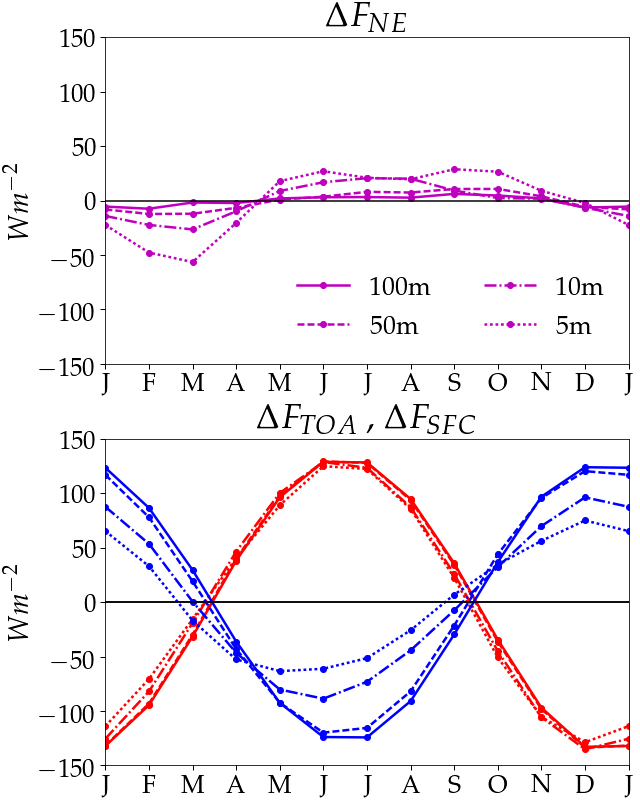

In [112]:
m_to_m=0; l=150
fig=py.figure(figsize=(9, 22))
compare_sfc_toa_dhdt(1,P_NE,'m',r'$\Delta F_{NE}$',m_to_m,l)
compare_sfc_toa_dhdt(2,P_toa,'r',' ',m_to_m,l)
compare_sfc_toa_dhdt(2,P_sfc,'b',r'$\Delta F_{TOA}$ ,   '+r'$\Delta F_{SFC}$' ,m_to_m,l)
py.tight_layout()

In [113]:
# m_to_m=0; l=6
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_lhflx,'r',r'$\Delta I_{lhfx}$',m_to_m,l)
# compare_plot(2,I_shflx,'b',r'$\Delta I_{shflx}$',m_to_m,l)
# compare_plot(3,I_LWsfc,'g',r'$ \Delta I_{LW\:sfc}$',m_to_m,l)
# compare_plot(4,I_SWsfc,'m',r'$\Delta I_{SW\:sfc}$',m_to_m,l)

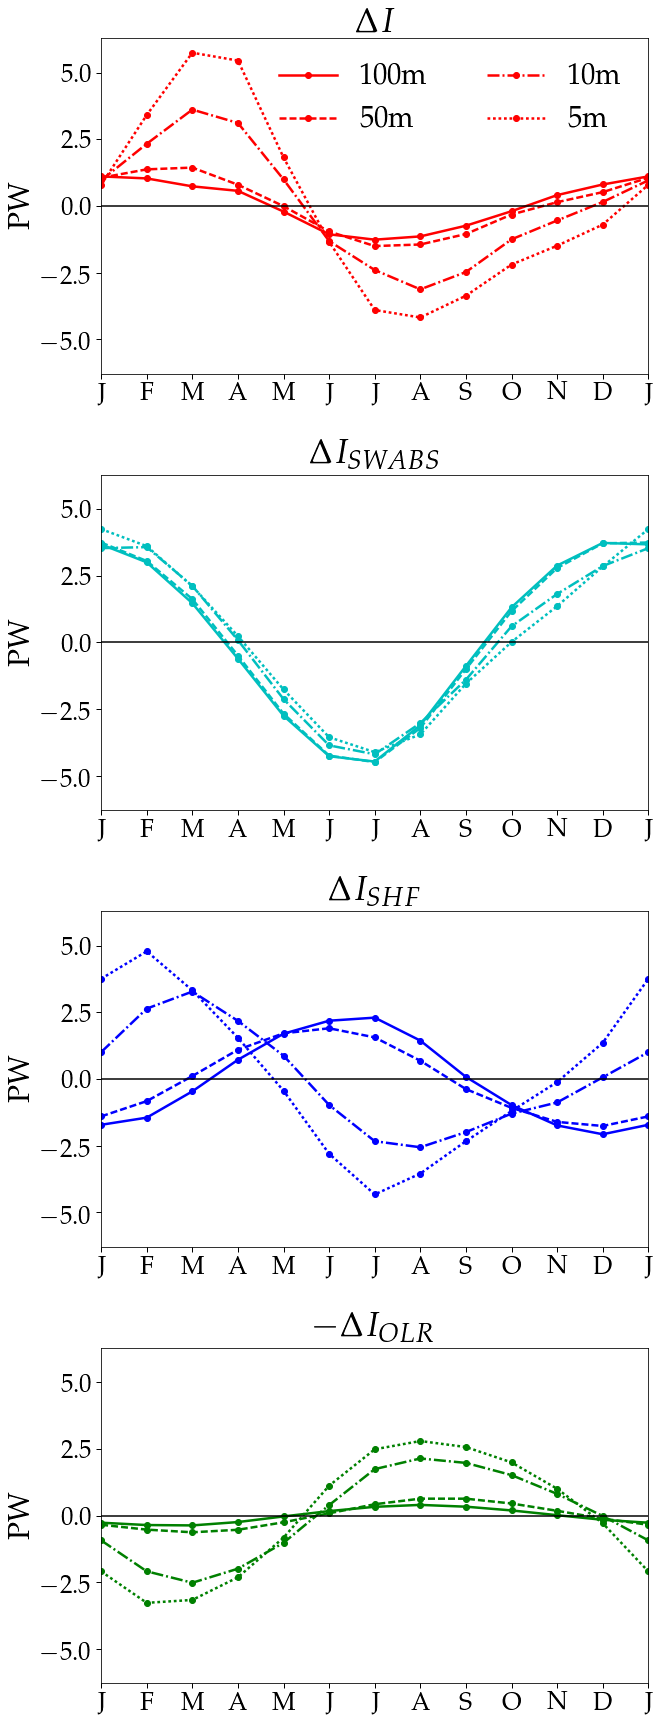

In [114]:
m_to_m=0; l=6.3
fig=py.figure(figsize=(10, 29.3))
compare_plot(1,Intensity_te,'r',r'$\Delta I$',m_to_m,l)
compare_plot(2,I_SWAB,'c',r'$\Delta I_{SWABS}$',m_to_m,l)
compare_plot(3,I_SHF,'b',r'$\Delta I_{SHF}$',m_to_m,l)
compare_plot(4,-I_OLR,'g',r'$-\Delta I_{OLR}$',m_to_m,l)


# compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$')
# compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$')
# compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$')
# compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$')


In [115]:
I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

In [116]:
# m_to_m=0; l=90
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,P_div_TE,'r',r'$\Delta {divTE}$',m_to_m,l)
# compare_plot(2,-P_div_SE,'b',r'$-\Delta {divSE}$',m_to_m,l)
# compare_plot(3,-P_div_MM,'g',r'$-\Delta {divMM}$',m_to_m,l)
# compare_plot(4,P_div_NE,'m',r'$\Delta {NE}$',m_to_m,l)

# Predict intensity

In [117]:
### radiation

def plot_intensity(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    fig=py.figure(figsize=(15, 9))           
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=2.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=2.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=2.5)
                                              
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title="Intensity decomposition"+" "+" ("+str(depth)+"m)"
    title1="Intensity_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'

    
    py.tight_layout()

In [118]:
def predict_intensity(X,month_to_month=1):
    
    proxy=np.array(X); te=np.array(Intensity_te);
    
    def diff(x):
        return x[:,1:]-x[:,:-1] 
    base_pos=te[:,:-1]
    a = lambda x: np.append(x[:,-1,None],x,axis=-1)
    
    if month_to_month==0 :
      def diff(x):
         return x[:,1:]-x[:,1:,None].mean(axis=1) 
      a = lambda x: np.append(x[:,-1,None],x,axis=-1)
      base_pos=te[...,1:,None].mean(axis=1)
        
    TE_ch=base_pos+diff(te)
    predict=base_pos+diff(proxy)
        
    return a(TE_ch), a(predict)

orig, predict = predict_intensity(Intensity_ne-Intensity_mm-Intensity_se,month_to_month=0)

In [119]:
# d=0
# py.plot(orig[d,:]-orig[d,:].mean(axis=-1),'r-')
# py.plot(predict[d,:]-predict[d,:].mean(axis=-1),'r--')



In [120]:
I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

In [121]:
# m_to_m=0; l=15
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,storm,'r','Storm  track  shift'+ r'$  \:(\Delta {\phi})$',m_to_m,l)
# py.ylabel('deg poleward')

In [122]:
zero_div_TE[0,...]

array([38.7165778 , 39.89003106, 42.60352813, 45.32972789, 47.64240875,
       47.38604569, 50.25284818,         nan, 53.54707787, 54.15079556,
       50.94798946, 45.49549215, 38.7165778 ])

In [123]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(d,l,month_to_month=1,threshold_value=+1) :
        
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
            
    I=Intensity_te
    
    n=d+1    
#     month_to_month=1
#     threshold_value=0
    SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
    if d==0:
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
    else :
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
    if ((d==0) & (month_to_month==0)):
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))
    
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))
    
    print zero_div_TE[0,...]
    
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    base_pos=zero_div_TE[d,:-1]
    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y
        
    if month_to_month==0:
        s=TE_change[d,:,1:].mean(axis=-1)[None,:,None]
        base_pos=find_zero(s)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        #base_pos=44 #np.nanmean(zero_div_TE[d,:-1])
        print base_pos
        
    TE_obs_pos         = add_month_to_end(zero_div_TE[d,1:]-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE[d,1:]-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM[d,1:]-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE[d,1:]-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
        
#     py.subplot(220+n)
    
    fig=py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi$',linewidth=3.5,markersize=12)
    fig=py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=12)
    fig=py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=3.5,markersize=12)
    fig=py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=3.5,markersize=12)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=3.5,markersize=12)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)

    title="shift decomposition"+" "+" ("+str(depth)+"m)"
    title1="shift_decomp"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()
    return zero_div_TE

[38.7165778  39.89003106 42.60352813 45.32972789 47.64240875 47.38604569
 50.25284818 49.71150619 53.54707787 54.15079556 50.94798946 45.49549215
 38.7165778 ]
[[38.32605363]]


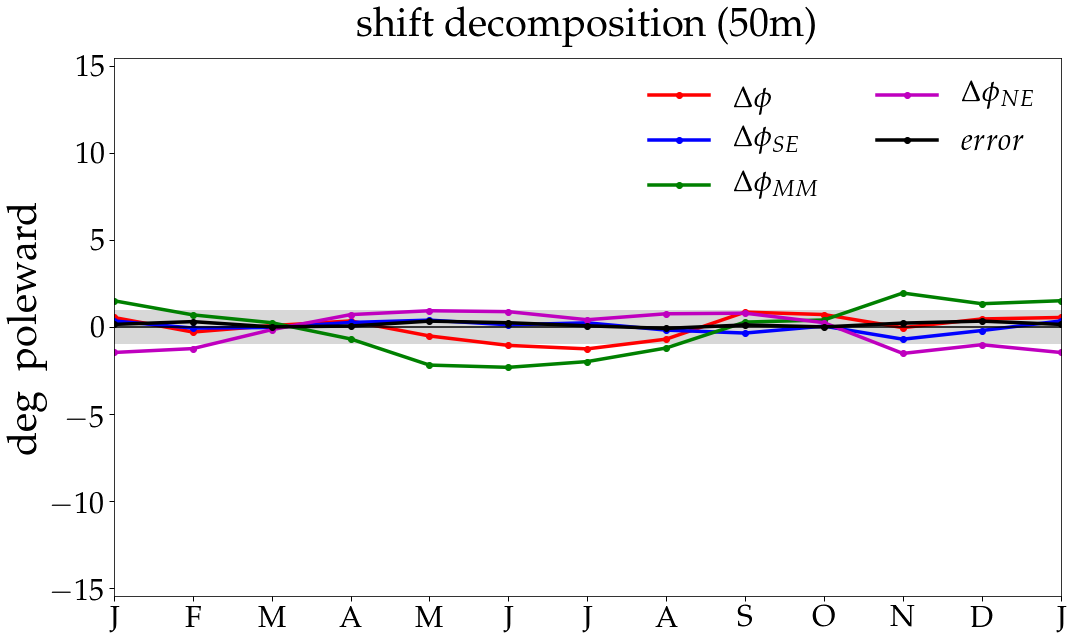

In [124]:
l=15.5
month_to_month=0; threshold_value=+0.0
storm=plot_monthly_shift(2,l,month_to_month,threshold_value)

In [125]:
# py.figure(figsize=(15,7))
# v=np.linspace(-60,60,30)
# for d in range(4):
#     py.subplot(2,2,d+1)
#     py.title(str(depths[d])+'m',fontsize=20)
#     py.contourf(range(13),lat_a,dhdt_a[d,...],v,cmap=cm.seismic);py.colorbar()
# py.tight_layout()

In [126]:
flux_vert[0]['MM'].shape

(1741, 40, 12)

# Look at the temperature

In [127]:
T=[]; Q=[]; U=[]; V=[]; Z=[]; EKE=[]; EMF=[];
MMv=[]; SEv=[]; NEv=[]; TEv=[];
divMMv=[]; divSEv=[]; divNEv=[]; divTEv=[];

for depth in range(len(DEPTHS)):
    T.append(M(raw[depth]['T']))
    Q.append(M(raw[depth]['q']))
    U.append(M(raw[depth]['U']))
    V.append(M(raw[depth]['V']))
    Z.append(M(raw[depth]['Z']))
    EKE.append(M(eke[depth]['EKE']))
    EMF.append(M(eke[depth]['EMF']))
    
    MMv.append(M(flux_vert[depth]['MM']))
    SEv.append(M(flux_vert[depth]['SE']))
    TEv.append(M(flux_vert[depth]['TE']))
    NEv.append(M(flux_vert[depth]['NE']))
        
    divMMv.append(M(div_vert[depth]['MM']))
    divSEv.append(M(div_vert[depth]['SE']))
    divTEv.append(M(div_vert[depth]['TE']))
    divNEv.append(M(div_vert[depth]['NE']))
    
T=np.array(T); U=np.array(U); V=np.array(V); Z=np.array(Z); Q=np.array(Q); EKE=np.array(EKE); EMF= np.array(EMF)
MMv=np.array(MMv); SEv=np.array(SEv); TEv=np.array(TEv); NEv=np.array(NEv);
divMMv=np.array(divMMv); divSEv=np.array(divSEv); divTEv=np.array(divTEv); divNEv=np.array(divNEv);

In [128]:
print T.shape
print TS_a.shape

(4, 1741, 40, 12)
(4, 871, 13)


In [129]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,:,:]+flux_flag*np.roll(x[:,l_S,:,:][:,::-1,:,:], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[...,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [130]:
T_a      , U_a,       V_a   , Q_a,    Z_a,  lat_a             = N_S_avg(T, U, V, Q, Z, lat,flux_flag=1)
MMv_a    , SEv_a,     TEv_a   , NEv_a,    EMF_a,  lat_a       = N_S_avg(MMv   , SEv,     TEv  ,  NEv,   EMF, lat,flux_flag=-1)
divMMv_a , divSEv_a,  divTEv_a  , divNEv_a,  EKE_a,  lat_a    = N_S_avg(divMMv, divSEv,  divTEv, divNEv, EKE, lat,flux_flag=1)


### Calculate the temperature gradient

In [131]:
sigma_full=eke[0]['sigma_full']

Cp= 1004.64 # J/kg/deg
g = 9.8
L = 2.500e6   # J/kg

In [132]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div_for_full_field(x,fac=1):
       N=50
#        fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
         for m in range(13):
            for p in range(len(sigma_full)):
              div[d,:,p,m]= smooth( np.gradient((x[d,:,p,m])*(fac),dtheta)/( R*np.cos(np.radians(lat_a[:])) ),N)
       return div


def spher_div_for_temp(x):
       N=50
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
         for m in range(13):
              div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( R*np.cos(np.radians(lat_a[:])) ),N )
       return div


divCpT_a = spher_div_for_full_field(Cp*T_a)
divLq_a  = spher_div_for_full_field(L*Q_a)
divgZ_a  = spher_div_for_full_field(g*Z_a)
divMSE_a = spher_div_for_full_field(Cp*T_a+g*Z_a+L*Q_a)

divCpTS_a = spher_div_for_temp(Cp*TS_a)

divEMF_a  = spher_div_for_full_field(EMF_a,fac=np.cos(np.radians(lat_a)))


# div_SE_a=spher_div(SE_a*10**15)
# div_MM_a=spher_div(MM_a*10**15)
# div_NE_a=div_TE_a+div_SE_a+div_MM_a

In [133]:
def ann_mean(y):
    return np.squeeze(np.dstack([y[:,:,:,:].mean(axis=-1)]))

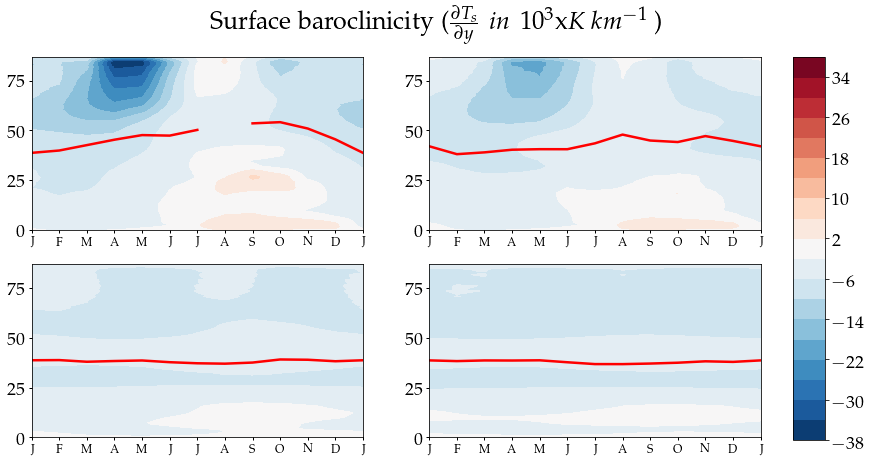

In [134]:
fig=py.figure(figsize=(15,7))
vrange=np.arange(-38,42,4)
for d in range(4):
    ax=py.subplot(2,2,d+1)
    #c=ax.contourf(range(13), lat_a,10**3*(divCpT_a)[d,:,0,:],vrange,cmap=BuRd);#py.colorbar()
    c=ax.contourf(range(13), lat_a,10**6*(divCpTS_a)[d,:,:]/Cp,vrange,cmap=BuRd);#py.colorbar()
    ax.plot(range(13),zero_div_TE[d,:],'r-',lw=2.5)
    ax.tick_params(labelsize=18,size=3,width=1)
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    py.xticks(range(13),mticks,size=12)
    
#     cont=ax.contour(range(13), lat_a,10**6*(vert_divCpT)[d,...]/Cp,colors='k');#py.colorbar()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.12, 0.03, 0.76])
cbar=fig.colorbar(c, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
py.suptitle(r"Surface baroclinicity ($\frac{\partial T_{s}}{\partial y}\: \:in \:\:10^{3}$x$K\:km^{-1}$ )", fontsize=25)


In [135]:
# fig=py.figure(figsize=(15,7))
# vrange=np.arange(-5,5.5,0.5)
# for d in range(4):
#     ax=py.subplot(2,2,d+1)
#     c=ax.contourf(range(13), lat_a, 10**4*(vert_divCpT)[d,...]/Cp ,vrange,cmap=BuRd);#py.colorbar()
#     ax.plot(range(13),zero_div_TE[d,:],'r-',lw=2.5)
#     ax.tick_params(labelsize=18,size=3,width=1)
#     mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
#     py.xticks(range(13),mticks,size=12)
    
# #     cont=ax.contour(range(13), lat_a,10**6*(vert_divCpT)[d,...]/Cp,colors='k');#py.colorbar()

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.83, 0.12, 0.03, 0.76])
# cbar=fig.colorbar(c, cax=cbar_ax)
# cbar.ax.tick_params(labelsize=18)
# py.suptitle(r"Vertically integrated baroclinicity ($\langle\frac{\partial T}{\partial y}\rangle\: \:in \:\:10$x$K\:km^{-1} kgm^{-2}$ )", fontsize=25)
     

In [136]:
sigma_full[-16]

195.33625519570887

##### Temperature is in the units of K*kg/m^2 since its weighted 

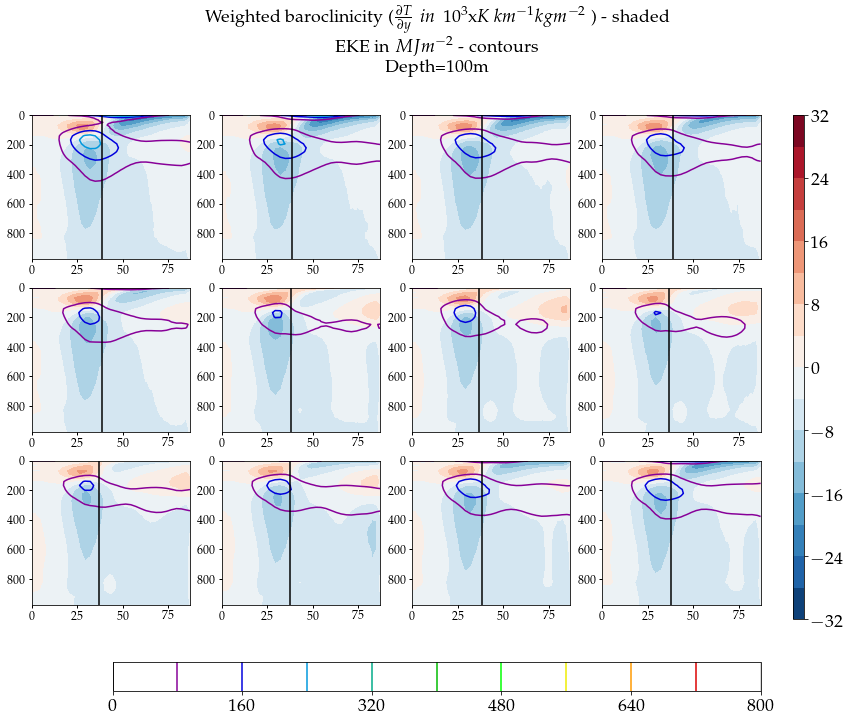

In [137]:
d=3
fig=py.figure(figsize=(15,10))
v=np.arange(-32,36,4)
urange=np.linspace(-100,100,10)
erange=np.arange(00,880,80)
for m in range(12):
    ax=py.subplot(3,4,m+1)
    c=ax.contourf(lat_a,sigma_full,10**6*(divCpT_a[d,...,m]).T/Cp,v,cmap=BuRd) ## J/m^2 per km; 
    ax.tick_params(labelsize=12,size=3,width=1)
    e=ax.contour(lat_a, sigma_full,(EKE_a[d,...,m]).T,erange,cmap='spectral') ## MJ/m^2; 
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.18, 0.01, 0.7])
cbar=fig.colorbar(c, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)

fig.subplots_adjust(bottom=0.2)
ebar_ax = cax = fig.add_axes([0.2, 0.08, 0.6, 0.04])
ebar=fig.colorbar(e, cax=ebar_ax,orientation='horizontal')
ebar.ax.tick_params(labelsize=18)

depths=['5m','10m','50m','100m']

py.suptitle(r" Weighted baroclinicity ($\frac{\partial T}{\partial y}\: \:in \:\:10^{3}$x$K\:km^{-1} kgm^{-2}$ ) - shaded" + '\n'+ r'EKE in  $ MJm^{-2}$ - contours' + '\n'+ 'Depth='+str(depths[d]), fontsize=18,y=1.03)
 
# py.tight_layout()

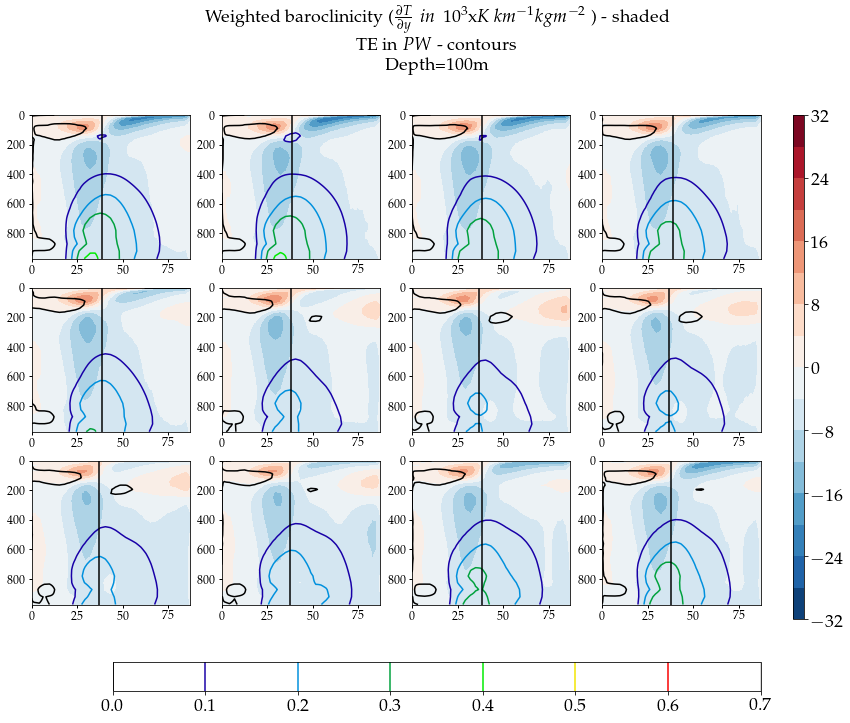

In [138]:
d=3
fig=py.figure(figsize=(15,10))
v=np.arange(-32,36,4)
urange=np.linspace(-100,100,10)
erange=np.arange(0.0,0.8,0.1)
for m in range(12):
    ax=py.subplot(3,4,m+1)
    c=ax.contourf(lat_a,sigma_full,10**6*(divCpT_a[d,...,m]).T/Cp,v,cmap=BuRd) ## J/m^2 per km; 
    ax.tick_params(labelsize=12,size=3,width=1)
    e=ax.contour(lat_a, sigma_full,(TEv_a[d,...,m]).T,erange,cmap='spectral') ## MJ/m^2; 
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.18, 0.01, 0.7])
cbar=fig.colorbar(c, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)

fig.subplots_adjust(bottom=0.2)
ebar_ax = cax = fig.add_axes([0.2, 0.08, 0.6, 0.04])
ebar=fig.colorbar(e, cax=ebar_ax,orientation='horizontal')
ebar.ax.tick_params(labelsize=18)

depths=['5m','10m','50m','100m']

py.suptitle(r" Weighted baroclinicity ($\frac{\partial T}{\partial y}\: \:in \:\:10^{3}$x$K\:km^{-1} kgm^{-2}$ ) - shaded" + '\n'+ r'TE in  $ PW $ - contours' + '\n'+ 'Depth='+str(depths[d]), fontsize=18,y=1.03)
 
# py.tight_layout()

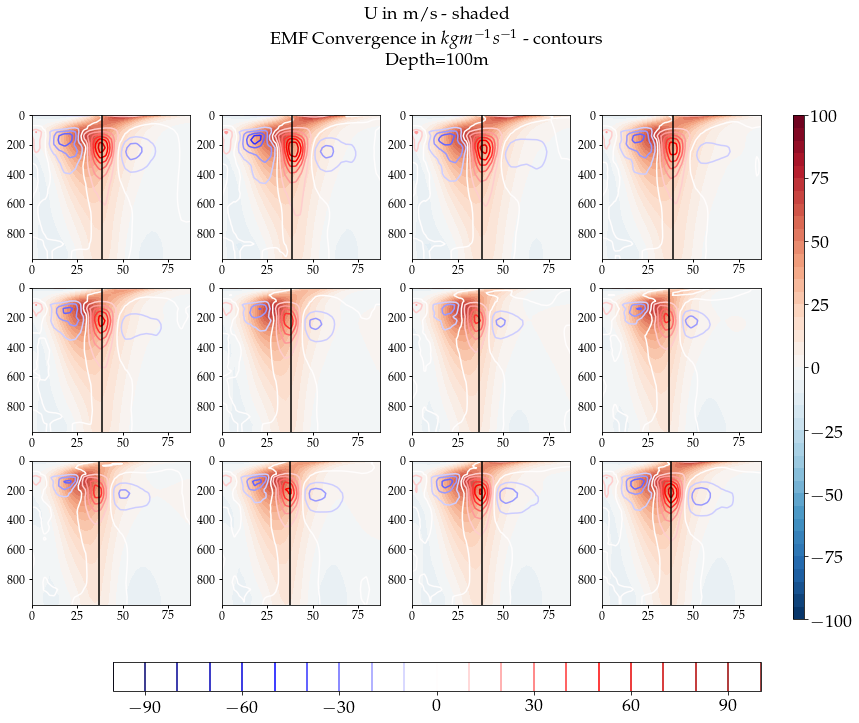

In [139]:
d=3
fig=py.figure(figsize=(15,10))
urange=np.arange(-100,105,5)
v=np.arange(-100,110,10)
erange=np.arange(0.0,0.8,0.1)
for m in range(12):
    ax=py.subplot(3,4,m+1)
    c=ax.contourf(lat_a,sigma_full,(U_a[d,...,m]).T,urange,cmap=BuRd) ## J/m^2 per km; 
    ax.tick_params(labelsize=12,size=3,width=1)
    e=ax.contour(lat_a, sigma_full,(-10**6*divEMF_a[d,...,m]).T,v,cmap=cm.seismic) ## MJ/m^2; 
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.18, 0.01, 0.7])
cbar=fig.colorbar(c, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)

fig.subplots_adjust(bottom=0.2)
ebar_ax = cax = fig.add_axes([0.2, 0.08, 0.6, 0.04])
ebar=fig.colorbar(e, cax=ebar_ax,orientation='horizontal')
ebar.ax.tick_params(labelsize=18)

depths=['5m','10m','50m','100m']

py.suptitle(r" U in m/s  - shaded" + '\n'+ r'EMF Convergence in  $ kgm^{-1}s^{-1} $ - contours' + '\n'+ 'Depth='+str(depths[d]), fontsize=18,y=1.03)
 
# py.tight_layout()

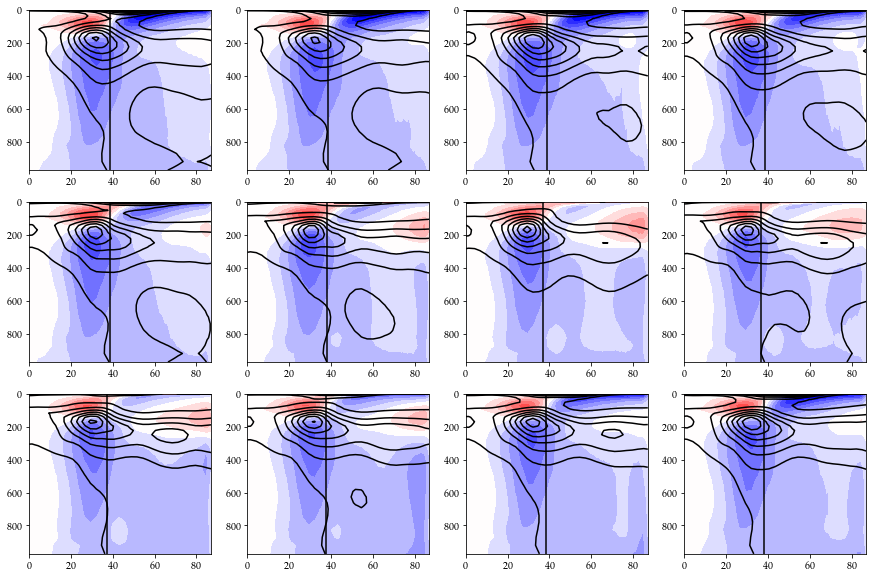

In [140]:
d=3
py.figure(figsize=(15,10))
v=np.linspace(-40,40,30)
urange=np.linspace(-100,100,10)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,10**3*(divCpT_a[d,...,m]).T,v,cmap=cm.seismic) ## J/m^2 per km
#     py.contour(lat_a, sigma_full,(U_a[d,...,m]).T,colors='k') ## m/s
    py.contour(lat_a, sigma_full,(EKE_a[d,...,m]).T,colors='k') ## MJ/m^2
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
#     py.yscale('log')

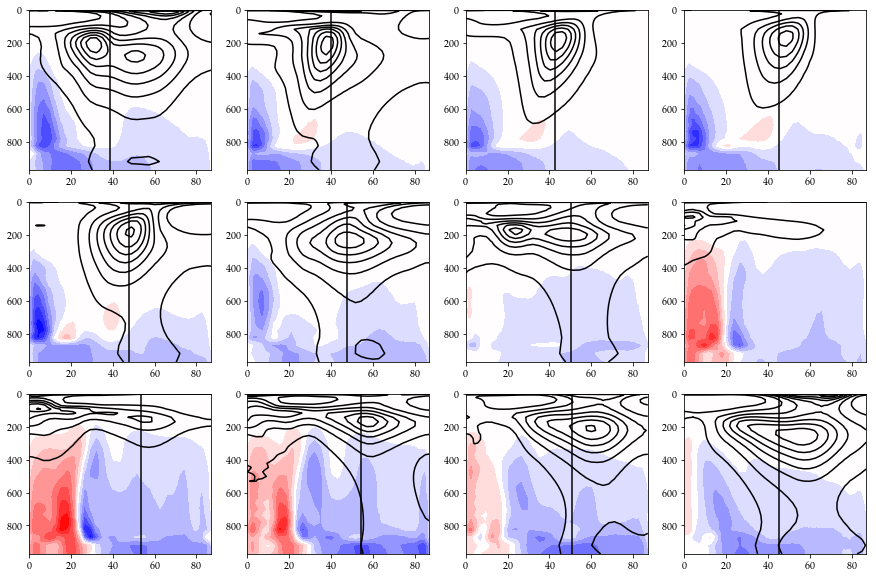

In [141]:
d=0
py.figure(figsize=(15,10))
v=np.linspace(-40,40,30)
urange=np.linspace(-100,100,10)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,10**3*(divLq_a[d,...,m]).T,v,cmap=cm.seismic) ## J/m^2 per km
    py.contour(lat_a, sigma_full,(EKE_a[d,...,m]).T,colors='k') ## MJ/m^2
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
#     py.yscale('log')

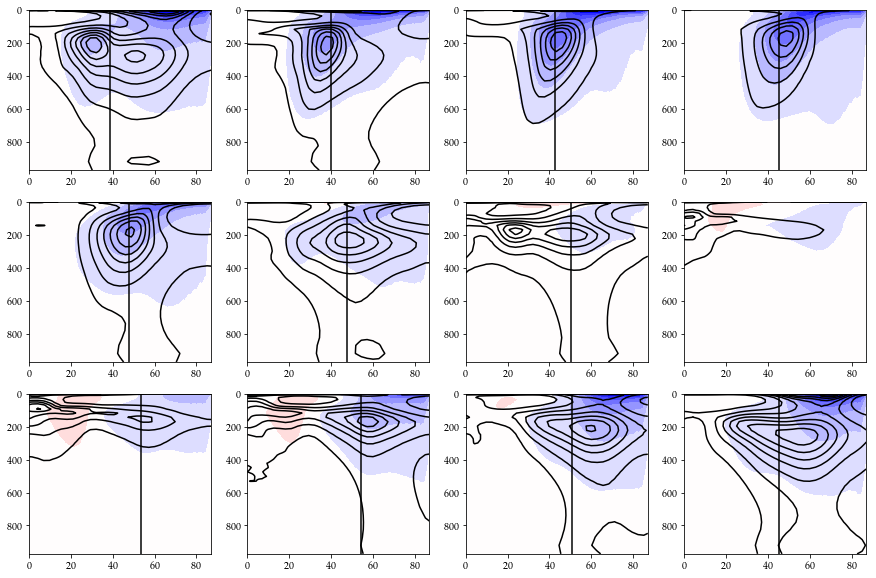

In [142]:
d=0
py.figure(figsize=(15,10))
v=np.linspace(-40,40,30)
urange=np.linspace(-100,100,10)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,10**3*(divgZ_a[d,...,m]).T,v,cmap=cm.seismic) ## J/m^2 per km
    py.contour(lat_a, sigma_full,(EKE_a[d,...,m]).T,colors='k') ## MJ/m^2
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
#     py.yscale('log')

In [143]:
def plot_all(d):
    py.figure(d+1,figsize=(15,10))
    v=np.linspace(-35,35,40)
    urange=np.linspace(-100,100,10)
    for m in range(12):
        py.subplot(3,4,m+1)
        py.contourf(lat_a,sigma_full,10**3*(divCpT_a[d,...,m]).T,v,cmap=cm.PiYG) ## J/m^2 per km
        py.contour(lat_a,sigma_full, 10**3*(divgZ_a[d,...,m]).T,v,cmap=cm.BrBG) ## J/m^2 per km
        py.contour(lat_a,sigma_full, 10**3*(divLq_a[d,...,m]).T,v,cmap=cm.seismic) ## J/m^2 per km
        py.contour(lat_a,sigma_full,(EKE_a[d,...,m]).T,cmap=cm.binary)
        py.axvline(zero_div_TE[d,m] , color='k')
        py.gca().invert_yaxis()
        py.suptitle(str(depths[d]),fontsize=20)
    #     py.yscale('log')

In [144]:
# plot_all(0)
# plot_all(1)
# plot_all(2)
# plot_all(3)

In [145]:
(SHF_a-SHF_a.mean(axis=-1)[...,None]).shape

(4, 871, 13)

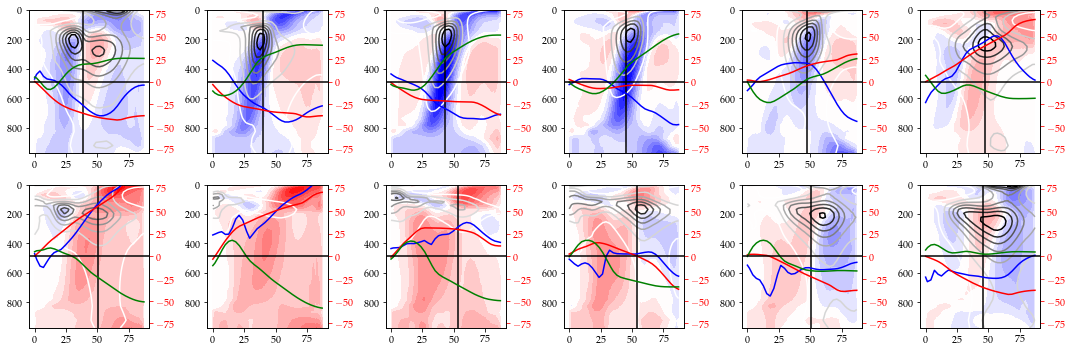

In [146]:
d=0
py.figure(figsize=(15,5))
v=np.linspace(-35,35,40)
urange=np.linspace(-100,100,10)
urange=np.linspace(-50,50,30)


for m in range(12):
    ax1=py.subplot(2,6,m+1)
    ax1.contourf(lat_a,sigma_full,10**3*((divCpT_a-divCpT_a.mean(axis=-1)[...,None])[d,...,m]).T,v,cmap=cm.seismic) ## J/m^2 per km
    ax1.contour(lat_a,sigma_full, (EKE_a[d,...,m]).T,cmap=cm.gist_yarg)
    ax1.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
    
    ax2 = ax1.twinx()
    ax2.plot(lat_a,(SHF_a-SHF_a.mean(axis=-1)[...,None])[d,:,m],color='b') ## J/m^2 per km
    ax2.plot(lat_a,(SWABS_a-SWABS_a.mean(axis=-1)[...,None])[d,:,m],color='r') ## J/m^2 per km
    ax2.plot(lat_a,-(OLR_a-OLR_a.mean(axis=-1)[...,None])[d,:,m],color='g') ## J/m^2 per km
#     ax2.set_ylabel("SHF", color='r',fontsize=20)
    py.ylim(-80,80)

#     ax2.plot(lat_a[:-1],(Ishf_a-Ishf_a.mean(axis=-1)[...,None])[d,:,m],color='b') ## J/m^2 per km
#     ax2.plot(lat_a[:-1],(Iswabs_a-Iswabs_a.mean(axis=-1)[...,None])[d,:,m],color='r') ## J/m^2 per km
#     ax2.plot(lat_a[:-1],-(Iolr_a-Iolr_a.mean(axis=-1)[...,None])[d,:,m],color='g') ## J/m^2 per km
#     py.ylim(-5,5)

    ax2.tick_params('y', colors='r')
    
    py.axhline(0,color='k')
    py.tight_layout()
    

    
    

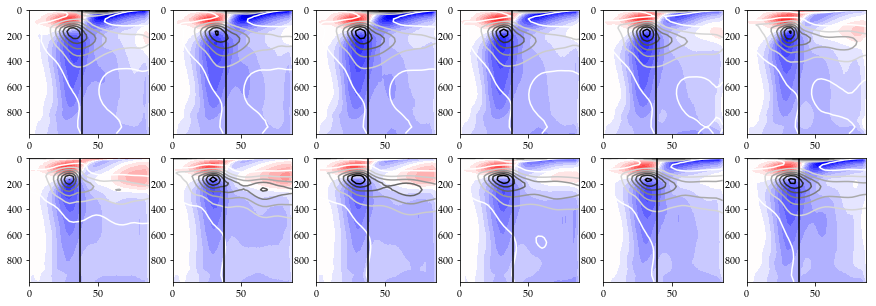

In [147]:
d=2
py.figure(figsize=(15,5))
v=np.linspace(-35,35,40)
urange=np.linspace(-100,100,10)
urange=np.linspace(-50,50,30)
for m in range(12):
    py.subplot(2,6,m+1)
    py.contourf(lat_a,sigma_full,10**3*(divCpT_a[d,...,m]).T,v,cmap=cm.seismic) ## J/m^2 per km
#     py.contour(lat_a,sigma_full, (TEv_a[d,...,m]).T,cmap=cm.Purples)
    py.contour(lat_a,sigma_full, (EKE_a[d,...,m]).T,cmap=cm.gist_yarg)
#     py.contour(lat_a,sigma_full, (U_a[d,...,m]).T,urange,cmap=cm.seismic)
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
#     py.yscale('log')

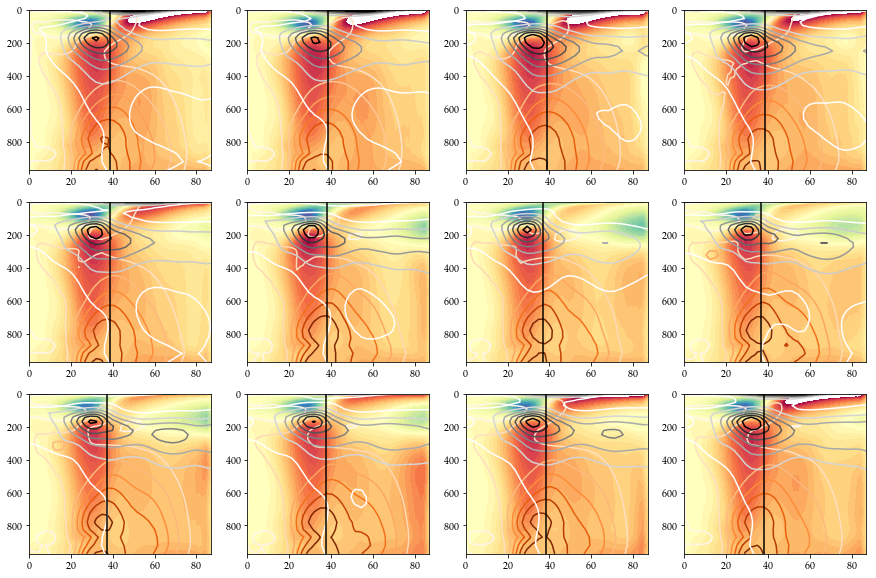

In [148]:
d=3
py.figure(figsize=(15,10))
v=np.linspace(-15,15,40)
urange=np.linspace(-100,100,10)
urange=np.linspace(-50,50,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,10**3*(divCpT_a[d,...,m]).T,v,cmap=cm.Spectral) ## J/m^2 per km
    py.contour(lat_a,sigma_full, (TEv_a[d,...,m]).T,cmap=cm.Oranges)
    py.contour(lat_a,sigma_full, (EKE_a[d,...,m]).T,cmap=cm.gist_yarg)
#     py.contour(lat_a,sigma_full, (U_a[d,...,m]).T,urange,cmap=cm.seismic)
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
#     py.yscale('log')

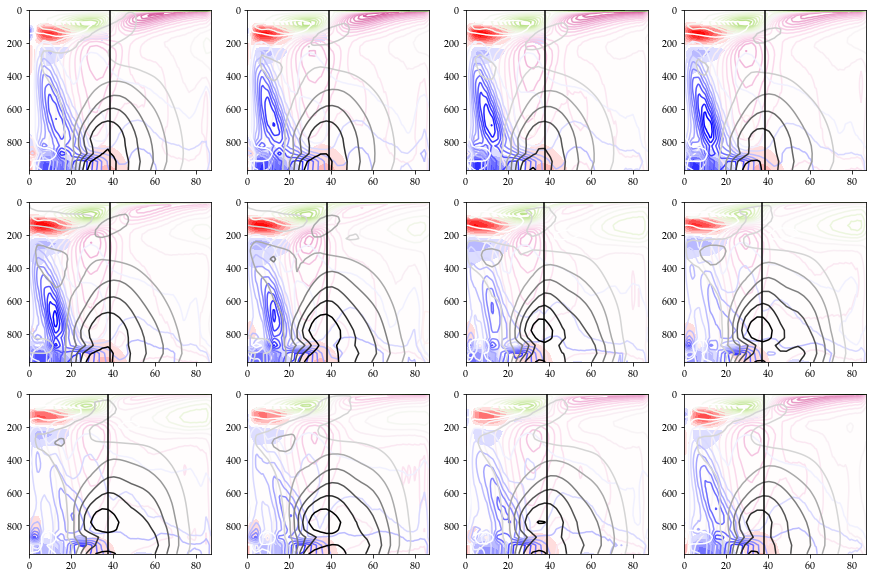

In [149]:
d=2
py.figure(figsize=(15,10))
v=np.linspace(-35,35,40)
urange=np.linspace(-100,100,10)
erange=np.linspace(-60,60,30)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contour(lat_a,sigma_full,10**3*(divCpT_a[d,...,m]).T,v,cmap=cm.PiYG) ## J/m^2 per km
#     py.contour(lat_a,sigma_full, 10**3*(divgZ_a[d,...,m]).T,v,cmap=cm.BrBG) ## J/m^2 per km
    py.contour(lat_a,sigma_full, 10**3*(divLq_a[d,...,m]).T,v,cmap=cm.seismic) ## J/m^2 per km
    py.contourf(lat_a,sigma_full,(MMv_a[d,...,m]).T,erange,cmap=cm.seismic)
    py.contour(lat_a,sigma_full, (TEv_a[d,...,m]).T,cmap=cm.binary)
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
#     py.yscale('log')

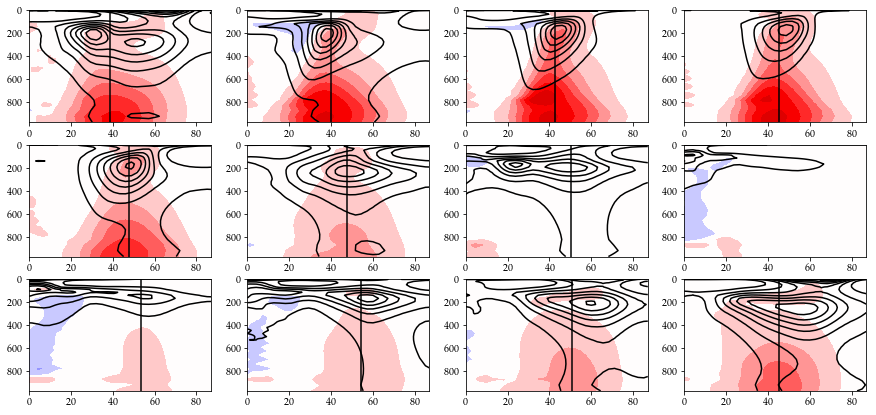

In [150]:
d=0
py.figure(figsize=(15,7))
v=np.linspace(-1,1,20)
urange=np.linspace(-100,100,10)
for m in range(12):
    py.subplot(3,4,m+1)
    py.contourf(lat_a,sigma_full,(TEv_a[d,...,m]).T,v,cmap=cm.seismic)
    py.contour(lat_a,sigma_full,(EKE_a[d,...,m]).T,colors='k')
#     py.contour(lat_a,sigma_full,10**6*(divT_a[d,:,:,m]-divT_a[d,...].mean(axis=-1)).T,v,colors='k')#cmap=cm.seismic)
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
#     py.yscale('log')

In [151]:
# d=3
# py.figure(figsize=(4,15))
# v=np.arange(-40,42,2)
# urange=np.linspace(-100,100,10)
# for m in range(12):
#     py.subplot(12,1,m+1)
#     py.contour(lat_a,sigma_full,10**6*(divCpT_a[d,...,m]).T/Cp,v,cmap=cm.seismic)
#     py.axvline(zero_div_TE[d,m] , color='k')
#     py.gca().invert_yaxis()
#     py.ylim(1000,200)
#     py.xlim(30,80)
# py.tight_layout()

# Nakamura 1992 barolinicity

In [152]:
Rk=287 # --> Gas constant
omega = 7.2921*10**-5 # ---> Rotation rate of earth rad/s
f = 2*omega*np.sin(np.deg2rad(lat_a)) # --> Coriolis frequency
the=(T_a*(1000/sigma_full)[None,None,:,None]**(Rk/Cp))

def vert_grad(x):
       N=1
       div=np.copy(x)
       for d in range( (x.shape[0]) ):
           for t in range( (x.shape[-1]) ):
               for l in range( (x.shape[1]) ):
                  div[d,l,:,t]= smooth( np.gradient((x[d,l,:,t]),sigma_full*100),N)
       return div

def vert_grad_with_Z(x):
       N=1
       div=np.copy(x)
       for d in range( (x.shape[0]) ):
           for t in range( (x.shape[-1]) ):
               for l in range( (x.shape[1]) ):
                  div[d,l,:,t]= smooth( np.gradient((x[d,l,:,t]),Z_a[d,l,:,t]),N)
       return div


In [153]:
d_theta_dp = vert_grad(the)

In [154]:
d_theta_dy = spher_div_for_full_field(the)

In [155]:
N_sq = -1*g**2*(100*sigma_full[None,None, :, None]/(Rk*T_a))*d_theta_dp/the

In [156]:
dU_dz = vert_grad_with_Z(U_a)

In [157]:
Ri_half= dU_dz/(np.sqrt(N_sq))

/home/pragallva/Project1/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [158]:
def P(p):
    mini=np.min(np.abs(sigma_full-p))
    y=np.squeeze(np.where( np.abs(sigma_full-p)==mini  ) )
    return y



In [159]:
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),6)
def add(y):
    y1 = y[...,:-1]#np.append(y,y[:,0,np.newaxis],axis=1)
    y= np.roll(y1,6,axis=-1)  
    return y
p1=500
p2=1000
Ri_low_tropo=Ri_half[:,:,P(p2):P(p1),:].sum(axis=2)/len(sigma_full[P(p2):P(p1)])

In [160]:
sigma_full[P(p2):P(p1)]

array([973.11994657, 921.04357349, 871.75401258, 825.1018703 ,
       780.94509144, 739.14774983, 699.57848043, 662.10856659,
       626.60972878, 592.95168548, 560.99957614, 530.61135574])

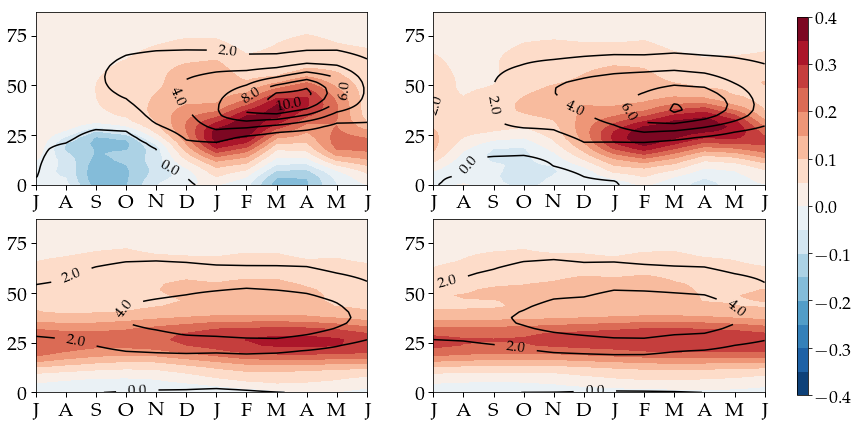

In [161]:
p1=500
p2=850
Ri_low_tropo=Ri_half[:,:,P(p2):P(p1),:].sum(axis=2)/len(sigma_full[P(p2):P(p1)])
v=np.arange(-0.4,0.45,0.05)
tev=np.arange(-12,14,2)
fig=py.figure(figsize=(15,7))
for d in range(4):
    ax=py.subplot(2,2,d+1)
    co=ax.contourf(range(12),lat_a,add(Ri_low_tropo)[d,...], v, cmap=BuRd);
    c=py.contour(range(12),lat_a,add(TE_a)[d,...], tev, colors='k');
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=15, fontsize=15)
    py.xticks(range(12),mticks,fontsize=15)
    ax.tick_params(labelsize=20,size=5,width=1)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.12, 0.01, 0.75])
cbar=fig.colorbar(co, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
# py.tight_layout()    

In [162]:
def plot_flux(d,threshold_value) :
    
    n=d+1
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    pos=zero_div_TE
    
    if d==0:depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100

    mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),6)
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       y= np.roll(y,6,axis=-1)  
       return y

    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-12.0, 13.0, threshold_value)
    latns=lat

    py.subplot(2,2,n)
    b = py.contourf(range(13),lat_a,add(TE_a[d,...]), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(range(13),lat_a, add(TE_a[d,...]), v, colors='k',linewidths=1.0);
    
    py.plot(range(13), np.roll((pos[d,:]),6), 'ro-')
    #py.plot(range(13), (Intensity_te[d,:]*5), 'bo-')
    
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(-0,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depth)+' m',fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
    py.ylim(0,80)
#     py.savefig(fig_dest+title+'_flux.pdf')
    #print fig_dest+title+'_flux.pdf'
    #py.show()

In [163]:
# d=3
# py.figure(figsize=(4,15))
# v=np.arange(-0.6,0.7,0.1)
# urange=np.linspace(-100,100,10)
# for m in range(12):
#     py.subplot(12,1,m+1)
#     #py.contourf(lat_a,sigma_full,(Ri_half[d,...,m]).T,cmap=cm.seismic); py.colorbar()
#     py.contour(lat_a,sigma_full,(Ri_half[d,...,m]).T,v,cmap=cm.seismic);  #py.colorbar()
#     py.axvline(zero_div_TE[d,m] , color='k')
#     py.gca().invert_yaxis()
#     py.ylim(1000,200)
#     py.xlim(30,80)
# py.tight_layout()

In [164]:
Ri_half.shape

(4, 871, 40, 13)

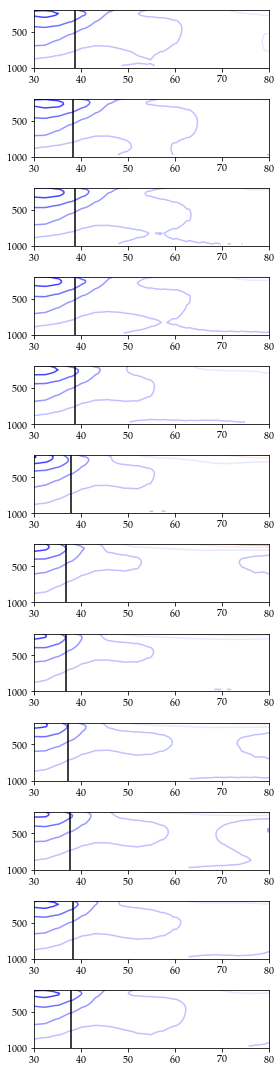

In [165]:
d=3; i=0;j=-18
py.figure(figsize=(4,15))
v=np.arange(-50,54,4)
urange=np.linspace(-100,100,10)
for m in range(12):
    py.subplot(12,1,m+1)
    #py.contourf(lat_a,sigma_full,(Ri_half[d,...,m]).T,cmap=cm.seismic); py.colorbar()
    py.contour(lat_a,sigma_full[:],(10**6*(d_theta_dy)[d,:,:,m]).T,v,cmap=cm.seismic); #py.colorbar()
#     py.contour(lat_a,sigma_full[:],(10**6*(d_theta_dy)[d,:,:,m]).T,v,cmap=cm.seismic); #py.colorbar()
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
    py.ylim(1000,200)
    py.xlim(30,80)
py.tight_layout()



/home/pragallva/Project1/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
/home/pragallva/Project1/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


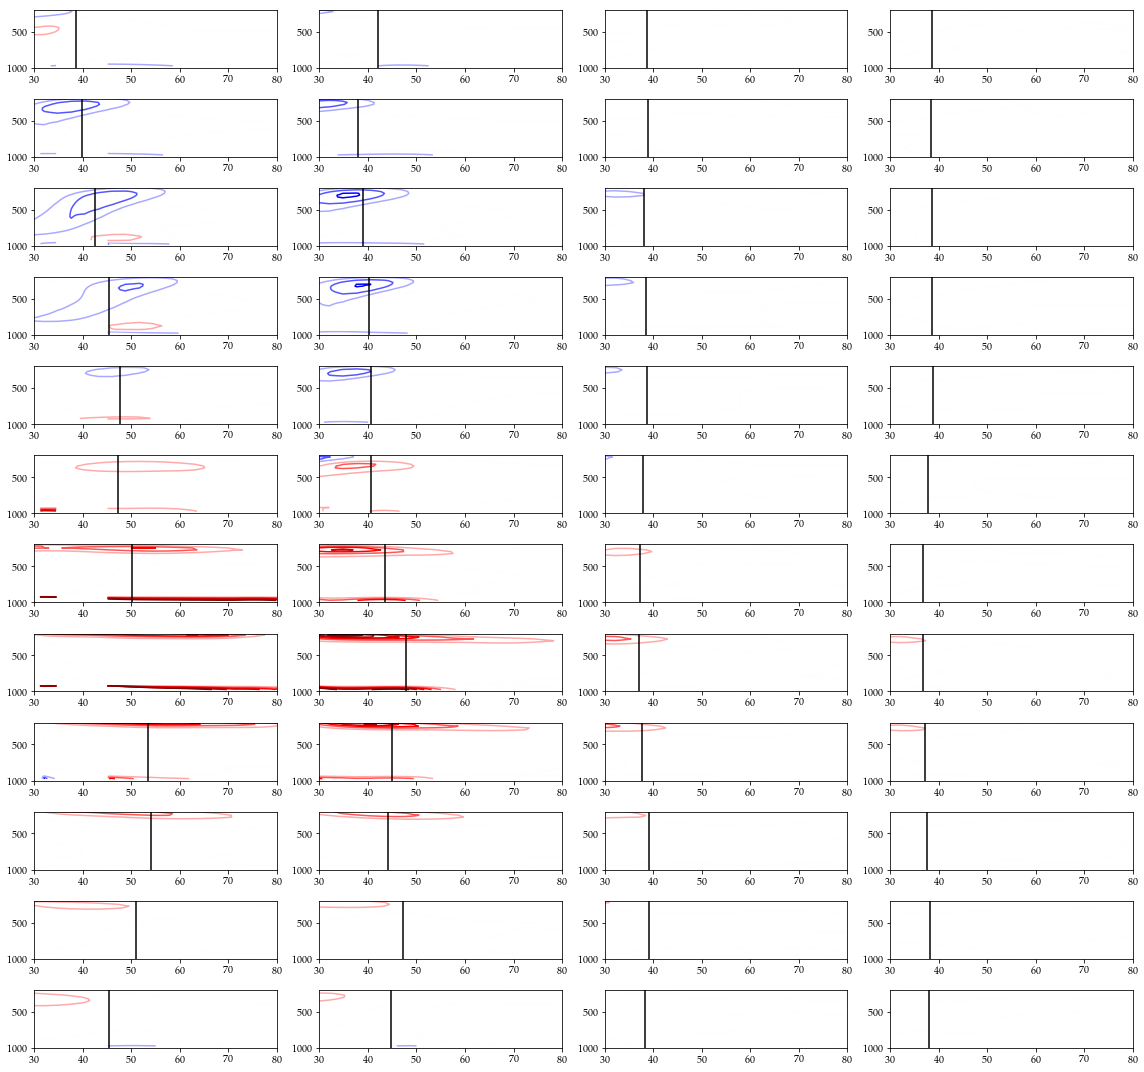

In [166]:
py.figure(figsize=(16,15))
v=np.arange(-0.30,0.35,0.05)
dele = lambda x : x - x.mean(axis=-1)[...,None]
an   = -dU_dz/ N_sq
au   = 1/np.sqrt(N_sq)

for d in range(4):
  for m in range(12):
    py.subplot(12,4,4*(m)+d+1)
    py.contour(lat_a,sigma_full[:],(an*dele(np.sqrt(N_sq)))[d,:,:,m].T,v,cmap=cm.seismic);#py.colorbar()
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
    py.ylim(1000,200)
    py.xlim(30,80)
py.tight_layout()

/home/pragallva/Project1/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


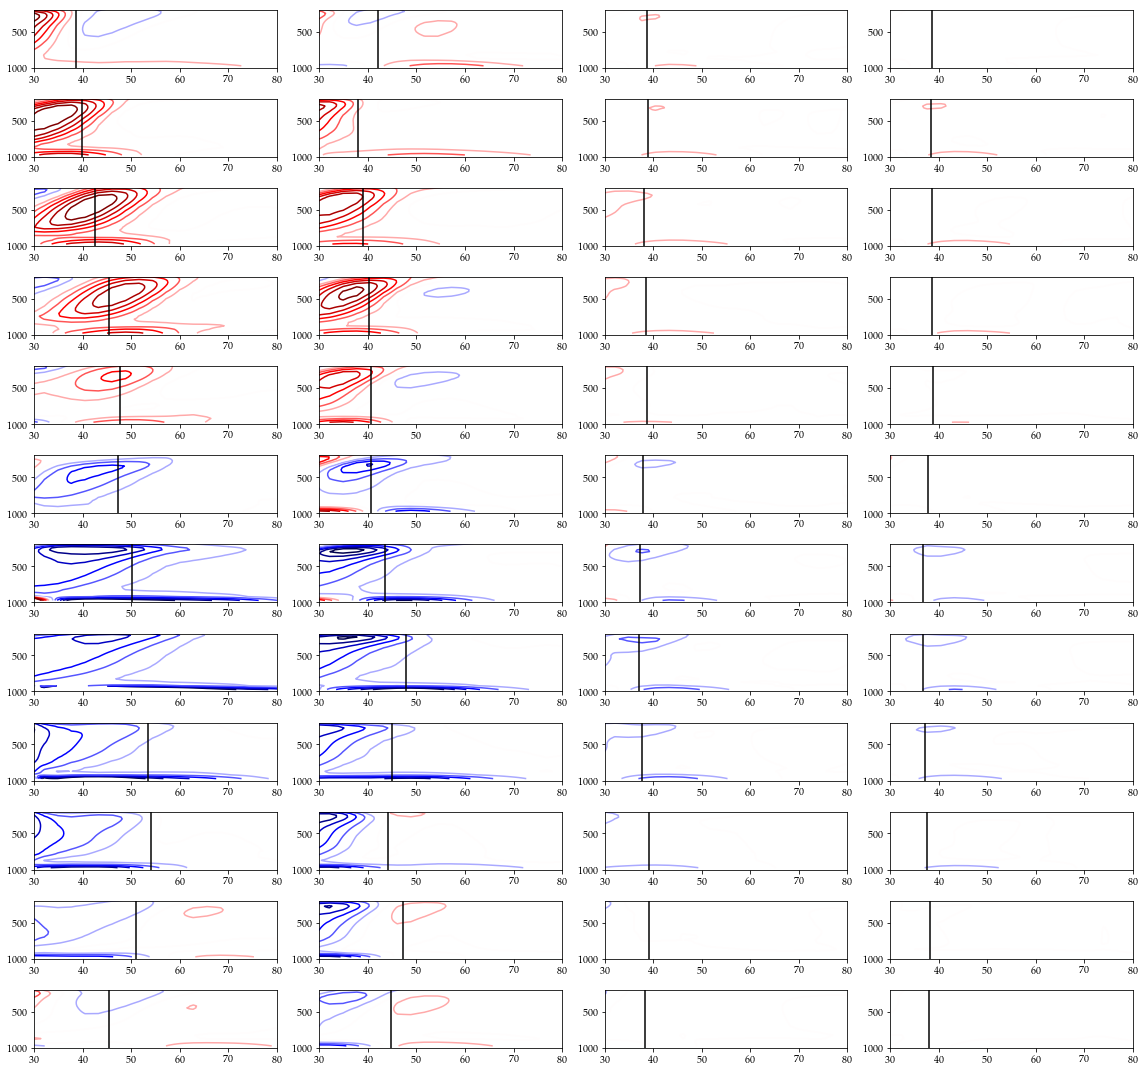

In [167]:
py.figure(figsize=(16,15))
v=np.arange(-0.30,0.35,0.05)
dele = lambda x : x - x.mean(axis=-1)[...,None]
an   = -dU_dz/ N_sq
au   = 1/np.sqrt(N_sq)

for d in range(4):
  for m in range(12):
    py.subplot(12,4,4*(m)+d+1)
    py.contour(lat_a,sigma_full[:],(au*dele((dU_dz)))[d,:,:,m].T,v,cmap=cm.seismic);#py.colorbar()
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
    py.ylim(1000,200)
    py.xlim(30,80)
py.tight_layout()

/home/pragallva/Project1/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
/home/pragallva/Project1/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


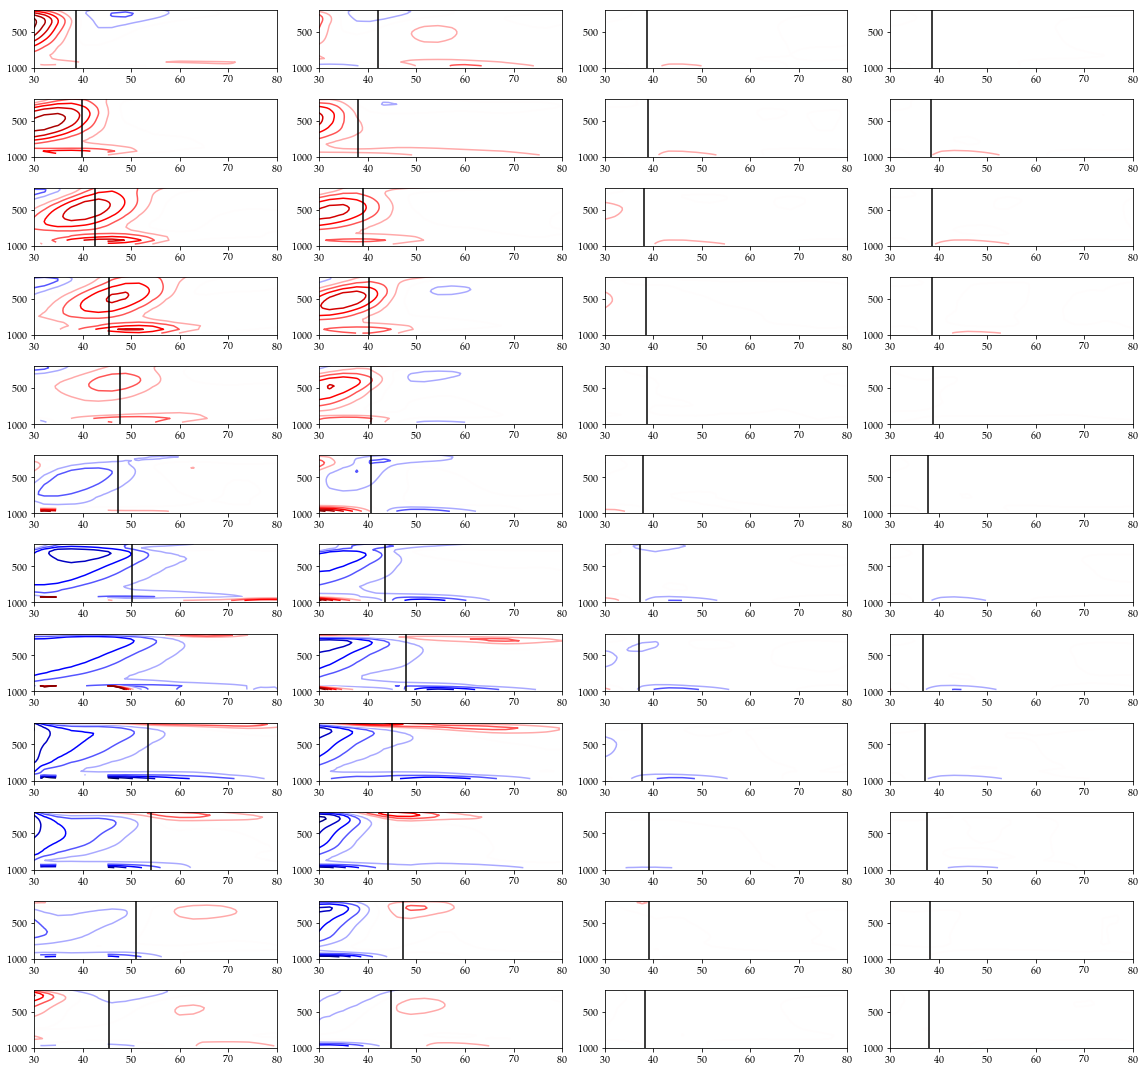

In [168]:
py.figure(figsize=(16,15))
v=np.arange(-0.30,0.35,0.05)
dele = lambda x : x - x.mean(axis=-1)[...,None]
an   = -dU_dz/ N_sq
au   = 1/np.sqrt(N_sq)

for d in range(4):
  for m in range(12):
    py.subplot(12,4,4*(m)+d+1)
    py.contour(lat_a,sigma_full[:],(au*dele(dU_dz)+   an*dele(np.sqrt(N_sq)))[d,:,:,m].T,v,cmap=cm.seismic);#py.colorbar()
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
    py.ylim(1000,200)
    py.xlim(30,80)
py.tight_layout()

/home/pragallva/Project1/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


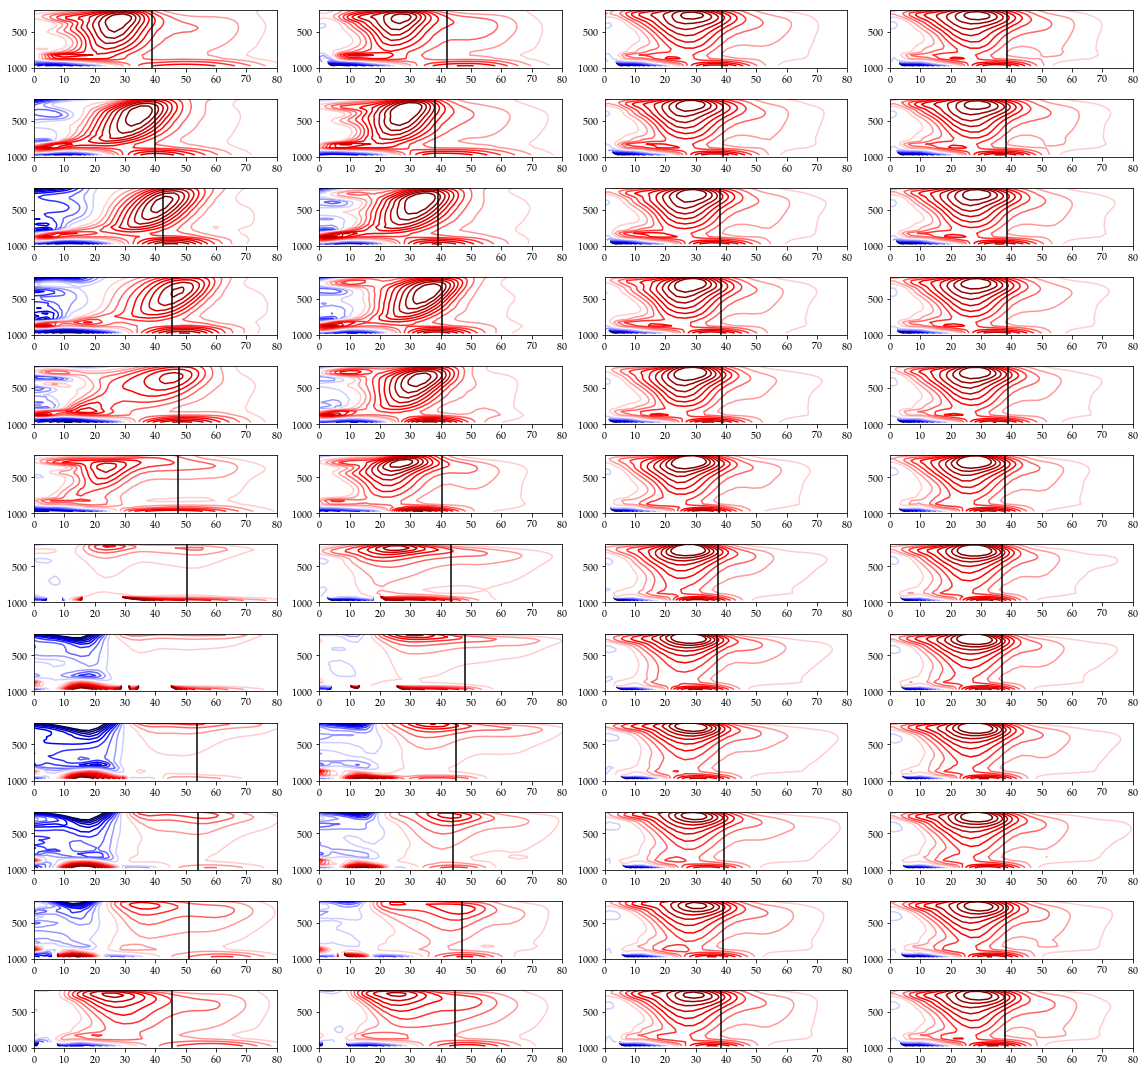

In [169]:
py.figure(figsize=(16,15))
v=np.arange(-0.5,0.55,0.05)
dele = lambda x : x - x.mean(axis=-1)[...,None]
an   = -dU_dz/ N_sq
au   = 1/np.sqrt(N_sq)

for d in range(4):
  for m in range(12):
    py.subplot(12,4,4*(m)+d+1)
    py.contour(lat_a,sigma_full[:],((Ri_half))[d,:,:,m].T,v,cmap=cm.seismic);#py.colorbar()
    py.axvline(zero_div_TE[d,m] , color='k')
    py.gca().invert_yaxis()
    py.ylim(1000,200)
    py.xlim(00,80)
py.tight_layout()

In [170]:
np.min((N_sq))

-4.854355305550056e-06

In [171]:
np.max((N_sq))

0.0008891971287968507

In [172]:
def P(p):
    mini=np.min(np.abs(sigma_full-p))
    y=np.squeeze(np.where( np.abs(sigma_full-p)==mini  ) )
    return y

# sigma_full[P(850):P(700)]

In [173]:
P = np.array([0.5 ,10.0, 30.0, 50.0, 70.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0, 600.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0])
P_half=np.append(0,P)

In [174]:
source = '/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/data_in_pres_coord/aqua_isca5m1/'

In [175]:
ls /project2/tas1/pragallva/Summer_quarter_2018/post_process_data/data_in_pres_coord/aqua_isca5m1/

ht_temp_sphum.hkl  stream_dic.hkl  u_v.hkl


In [176]:
ht=load(source+"ht_temp_sphum.hkl")

In [177]:
u=load(source+"u_v.hkl")

In [178]:
# k=k+1
# py.contourf(u['u'][:,k,:])

In [179]:
def seasonality(d):
    def M(X):
        l=(X-np.nanmean(X[1:]))/np.nanmax(np.abs(X))
        return l

    fig, ax1 = py.subplots()

    ax1.plot(range(13), M(Intensity_te[d,:]), 'bo-')
    ax1.set_xlabel("Months", color='k',fontsize=20)
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel("Intensity (PW)", color='b',fontsize=20)
    ax1.tick_params(labelsize=18)

    ax2 = ax1.twinx()
    ax2.plot(range(13), M(zero_div_TE[d,:]), 'ro-')
    ax2.set_ylabel("Storm track position (deg)", color='r',fontsize=20)
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    py.show()

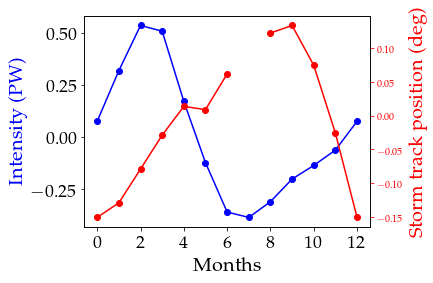

In [180]:
seasonality(0)

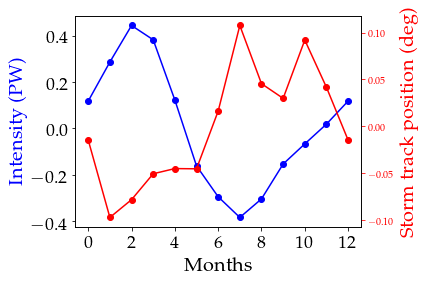

In [181]:
seasonality(1)

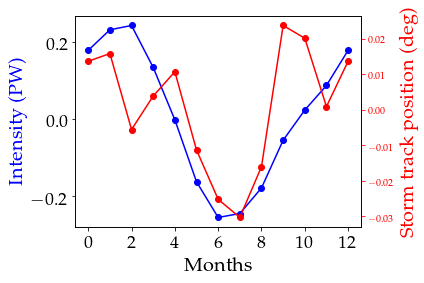

In [182]:
seasonality(2)

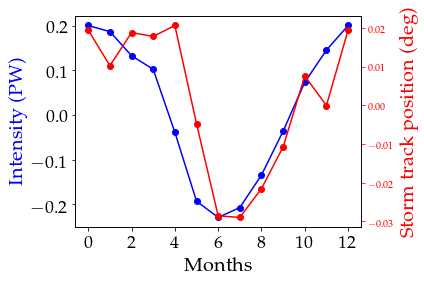

In [183]:
seasonality(3)

In [184]:
month_to_month=0
threshold_value=1
SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
#zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))


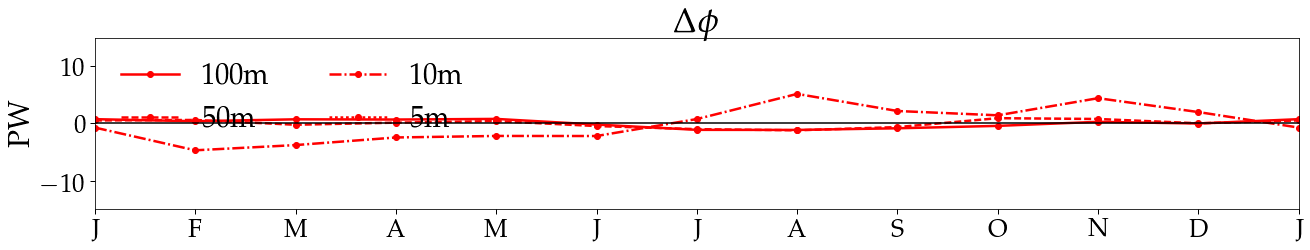

In [185]:
m_to_m=0; l=15
fig=py.figure(figsize=(22, 15))
compare_plot(1,zero_div_TE,'r',r'$\Delta {\phi}$',m_to_m,l)

In [186]:


if d==0:
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
else :
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
if ((d==0) & (month_to_month==0)):
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))


NameError: name 'I' is not defined

In [ ]:
zero_div_TE[0,:]

In [ ]:
np.array([38.57487012, 39.90803517, 42.71426456, 46.02972537, 47.36047713,
       47.23665445, 51.10316685,         np.nan, 53.92576279, 54.87475346,
       51.71721502, 45.49713626, 38.57487012])[:-1]

In [ ]:
m=0
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro-',label='5m')
m=1
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro--',label='10m')
m=2
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro-.',label='50m')
m=3
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro:', label='100m')
py.xticks(range(13),mticks,size=20)
py.tick_params(labelsize=20,size=5,width=1)
mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
py.ylim(-13,13)
py.legend(loc='best')

In [ ]:
month_to_month=0
threshold_value=1
SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))


In [ ]:
py.figure(1,figsize=(8,4))
m=m+1
d=0
py.plot(lat_a, SE_change[d,:,m],'b-')
py.plot(lat_a,TE_change[d,:,m],'r-')
py.plot(lat_a,NE_change[d,:,m],'m-')
py.plot(lat_a,MM_change[d,:,m],'g-')
py.axhline(0)
py.axvline(zero_div_SE[d,m],color='b')
py.axvline(zero_div_TE[d,m],color='r')
py.axvline(zero_div_MM[d,m],color='g')
py.axvline(zero_div_NE[d,m],color='m')
#py.axvline(base_pos,color='k',linewidth=5)
py.figure(2,figsize=(8,4))
py.plot(lat_a, SE_change[d,:,m+1],'b-')
py.plot(lat_a,TE_change[d,:,m+1],'r-')
py.plot(lat_a,NE_change[d,:,m+1],'m-')
py.plot(lat_a,MM_change[d,:,m+1],'g-')
py.axhline(0)
py.axvline(zero_div_SE[d,m+1],color='b')
py.axvline(zero_div_TE[d,m+1],color='r')
py.axvline(zero_div_MM[d,m+1],color='g')
py.axvline(zero_div_NE[d,m+1],color='m')
#py.axvline(base_pos,color='k',linewidth=5)
print m